Welcome back!!!

As another effort to put down the basics together, I am writing this Kernel to guide young professionals on how machine learning projects should be framed and approached. As I always say, you should look at these challeneges from outsider's persepective. The whole idea is to understand how complex problems should be broken down into manageable chunks.

<h1 id="tocheading">Table of Contents</h1>
<div id="toc"></div>

In [1]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

# The key objective
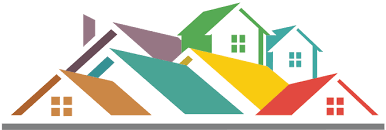

*Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.*

*With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.*

A dataset with 79 variables is given and the expectation is to build the model to predict the price of the house. Now there are different ways at looking at this challenge. 
1. Should we simply treat this as a data problem?
2. Had it been a real problem and not a kaggle competition, how differently we would have treated this?
3. Is the data enough (length & breadth) to predict house prices?
4. Real world house prices are primarily driven by certain key factors such as availability of good schools, crime rate, availability of transport, infrastructure projects and so on



In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv
/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt


In [3]:
#import some necessary librairies

%matplotlib inline
import matplotlib.pyplot as plt  # Matlab-style plotting
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)

from scipy import stats
from scipy.stats import norm, skew #for some statistics

# What data we have
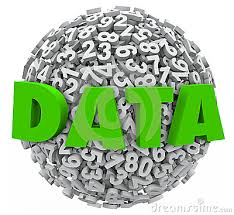

In the absence of external factors, we would leverage the given factors. If the number of variables are not too high, I would recommend creating an excel table to summarize your variable analysis. This would help in analyzing variable information at single place and you can avoid scrolling the kernel up and down to review each variable individually.

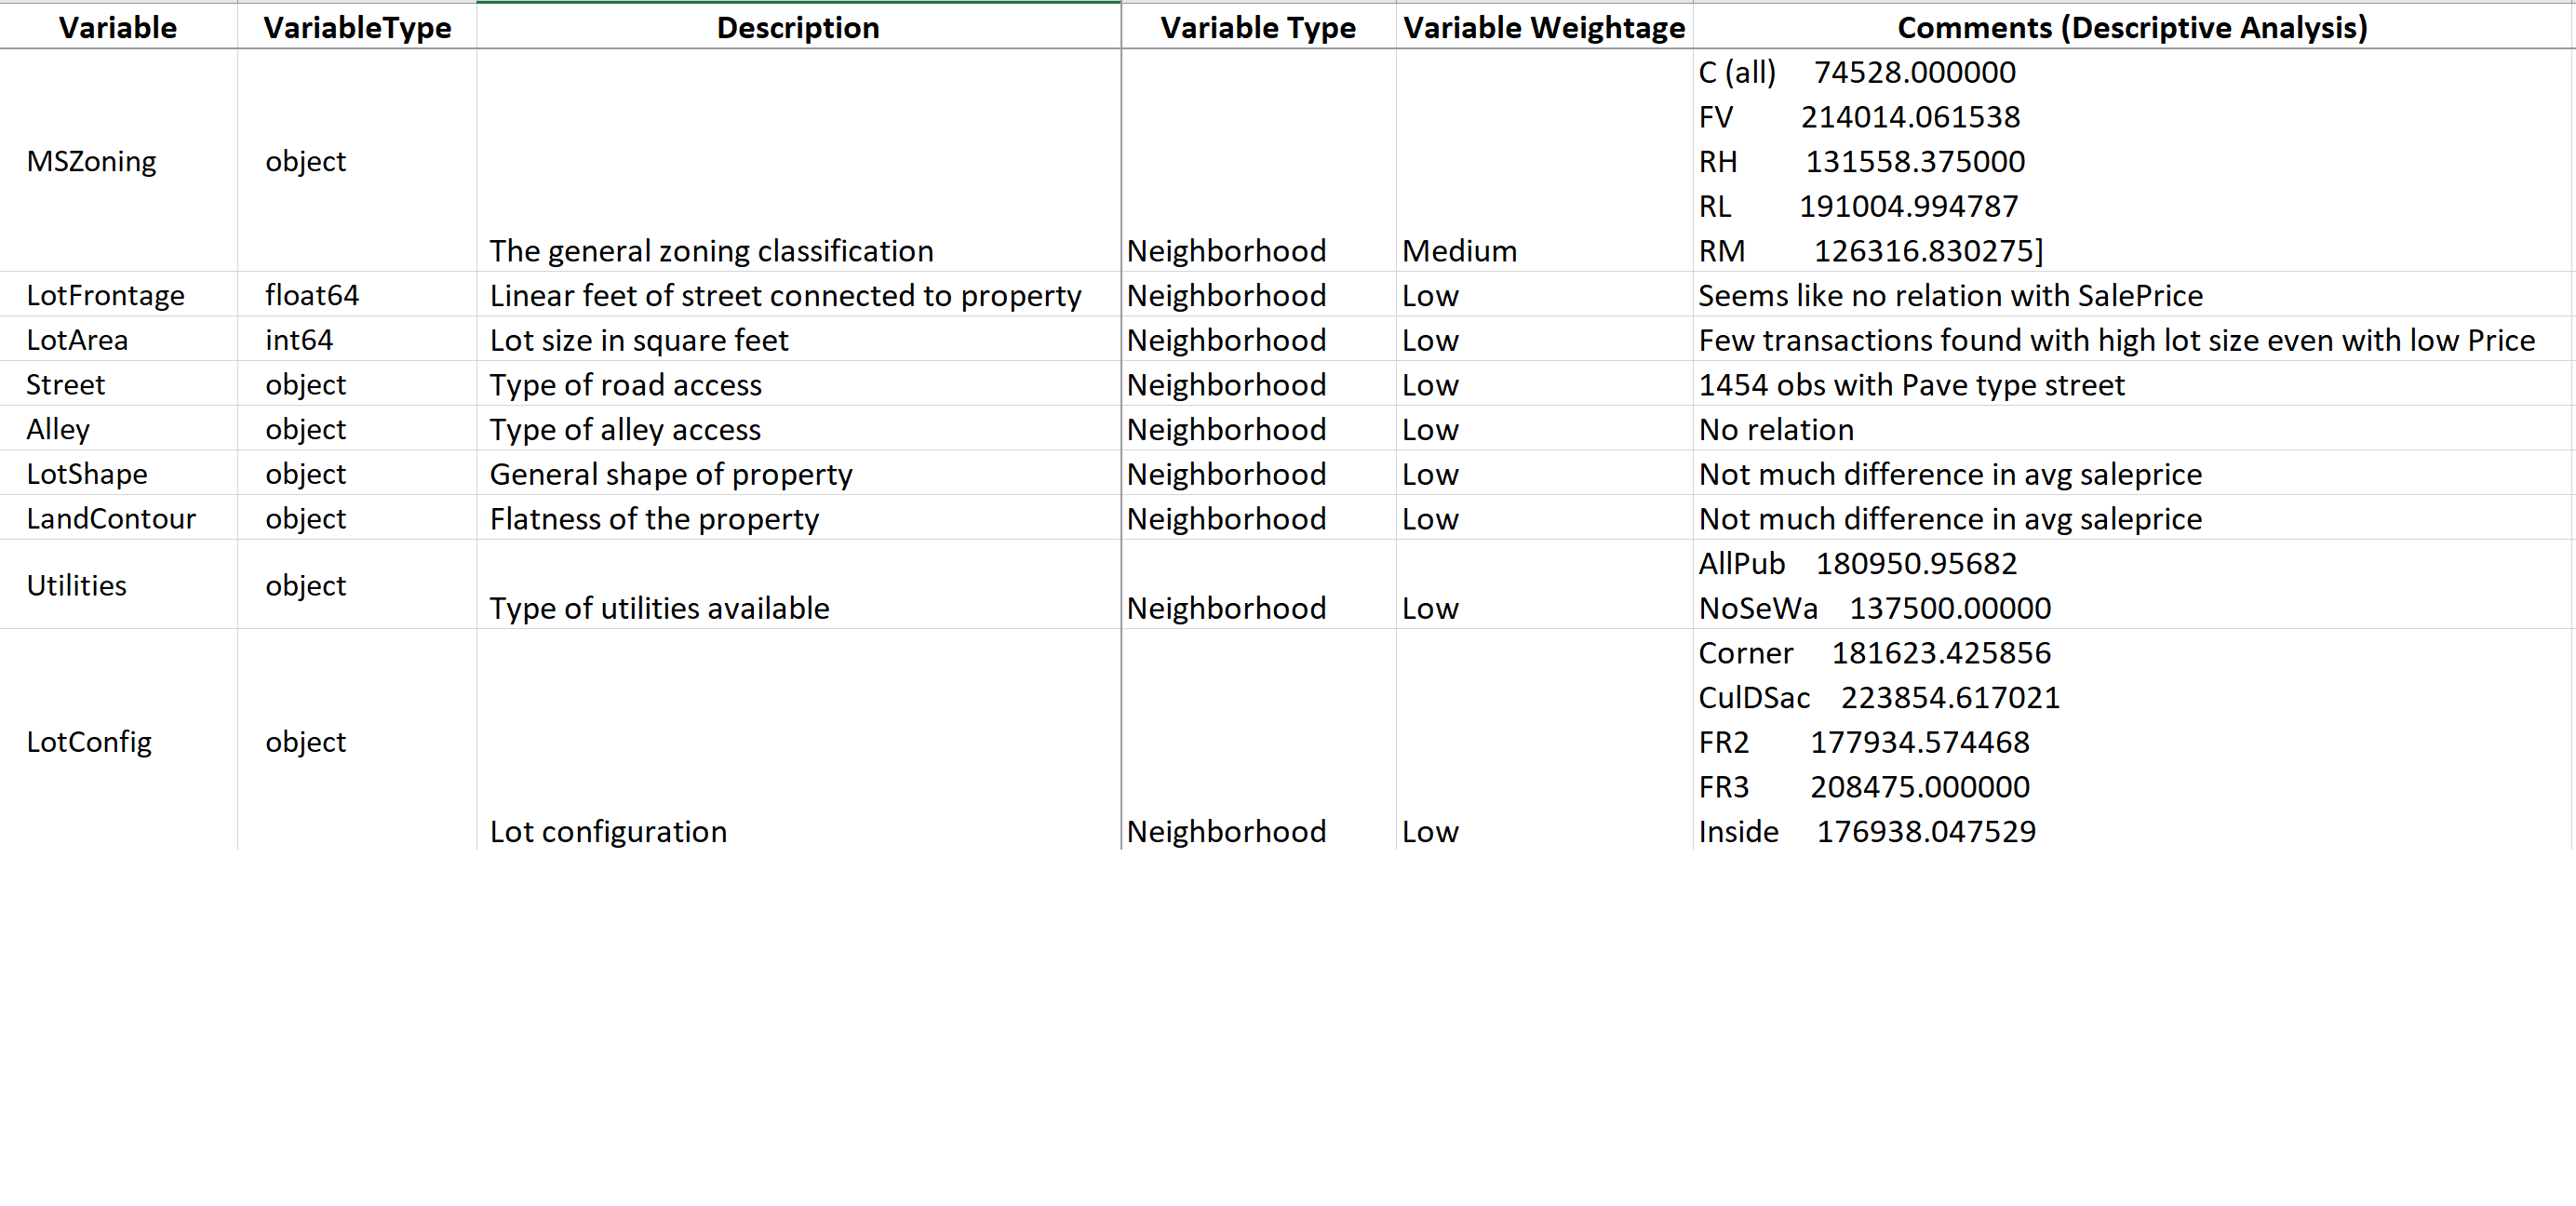

In [4]:
# Read the datasets
train = pd.read_csv("../input/house-prices-advanced-regression-techniques/train.csv")
test = pd.read_csv("../input/house-prices-advanced-regression-techniques/test.csv")

In [5]:
##display the first five rows of the train dataset.
train.shape

##display the first five rows of the test dataset.
test.shape

(1459, 80)

In [6]:
#Save the 'Id' column
train_ID = train['Id']
test_ID = test['Id']

#Now drop the  'Id' colum since it's unnecessary for  the prediction process.
train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)

# Exploratory data analysis
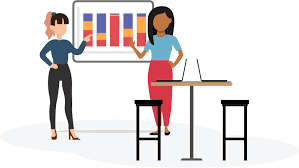

Though we can analyze each variable one by one through visualization, I find it much easier to simply write a function to draw plots at one go. To keep it simple, we are just going to plot categorical variables and analyze average Sale Prices for each.

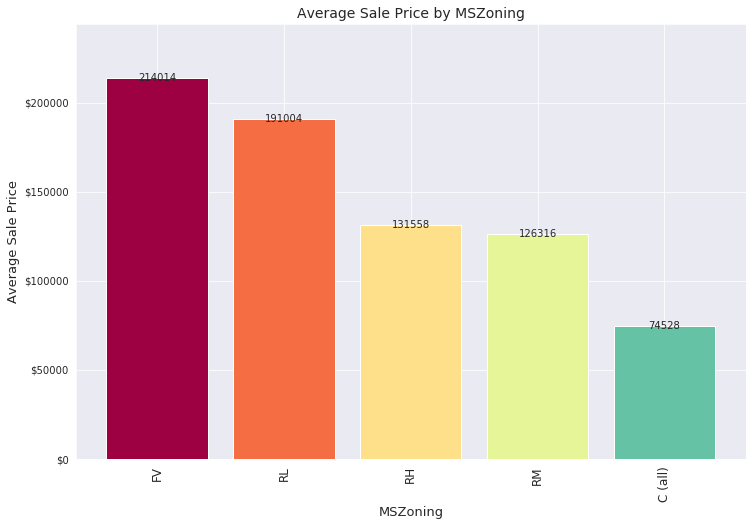

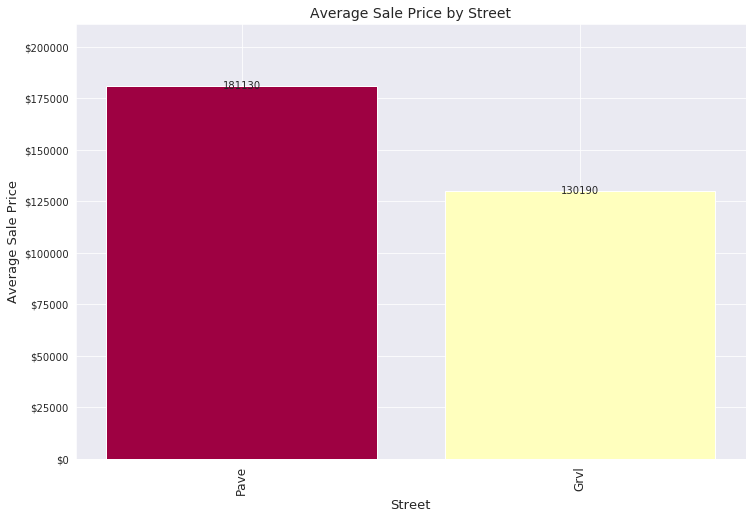

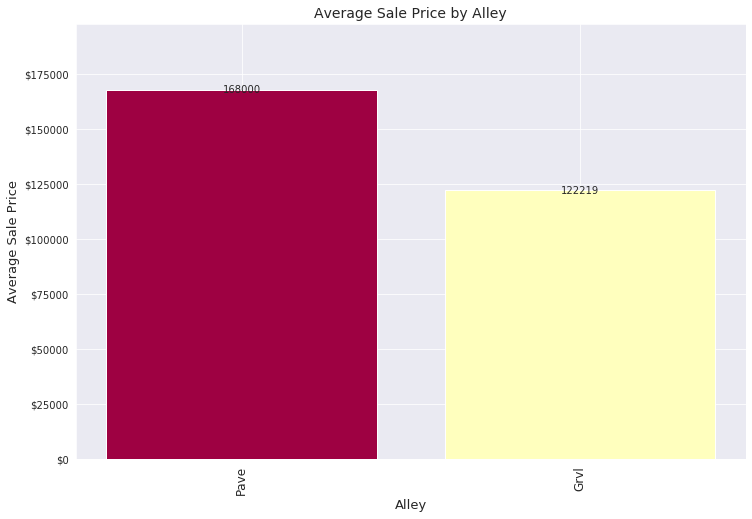

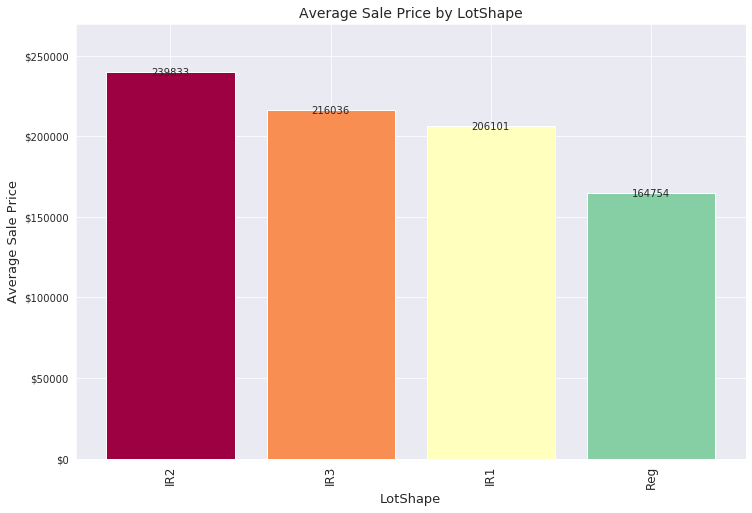

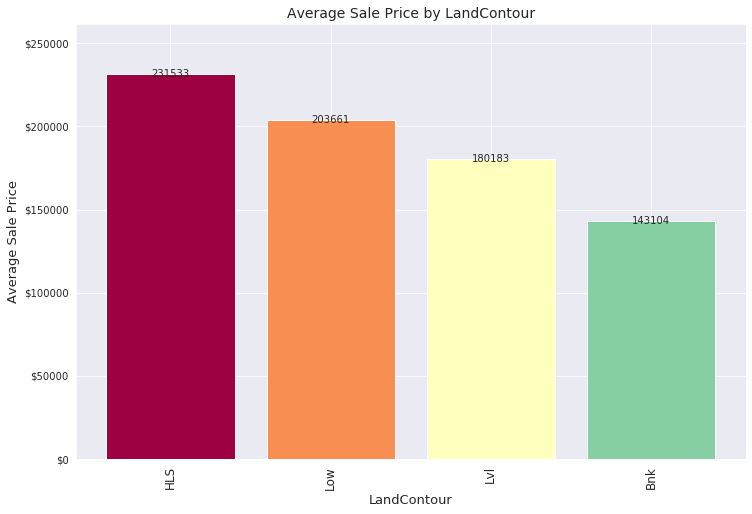

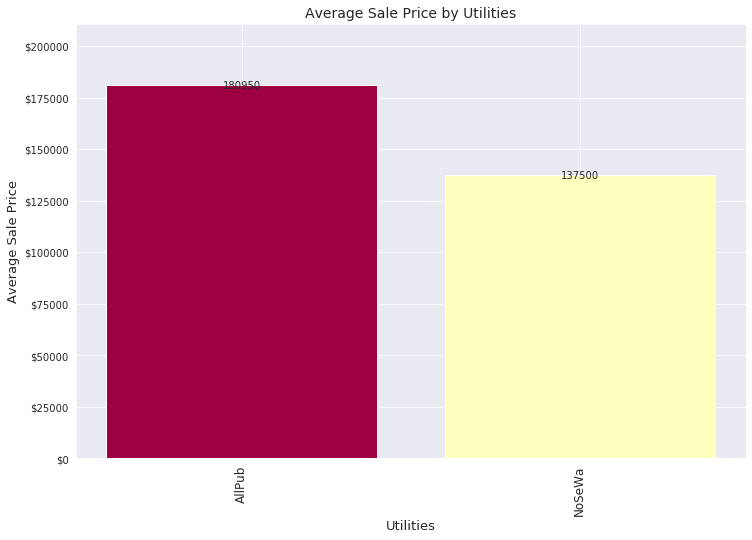

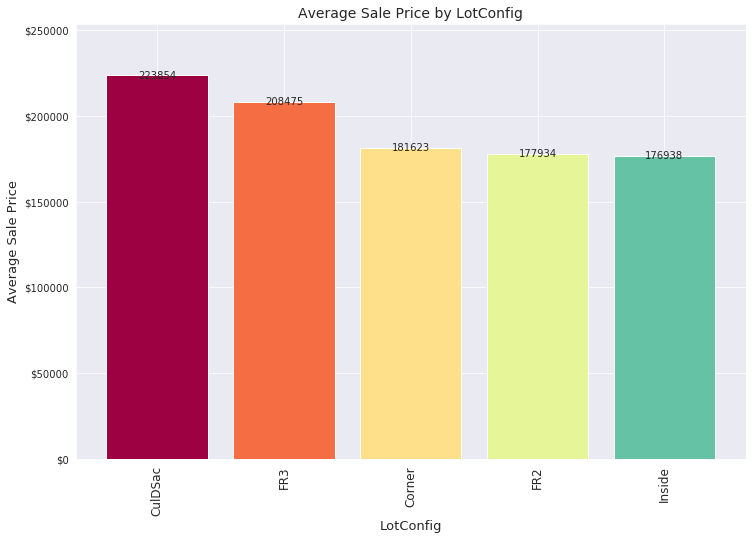

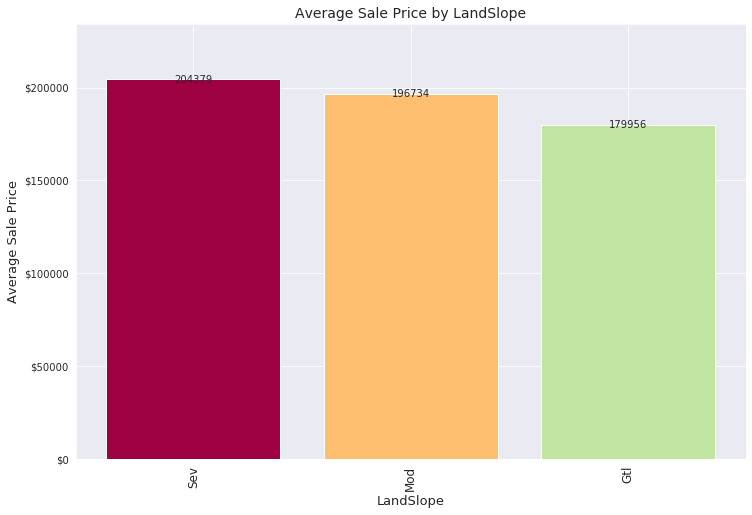

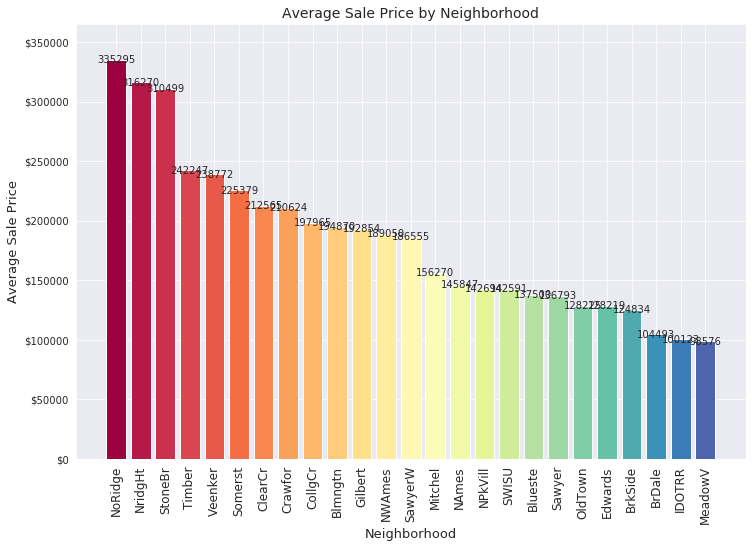

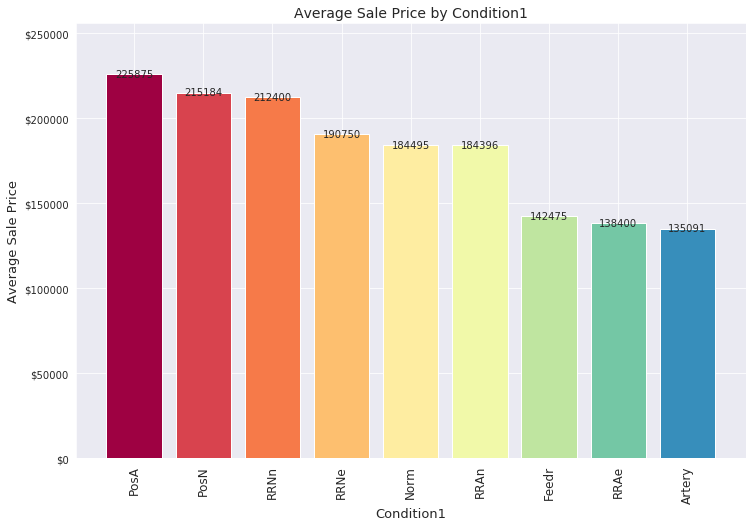

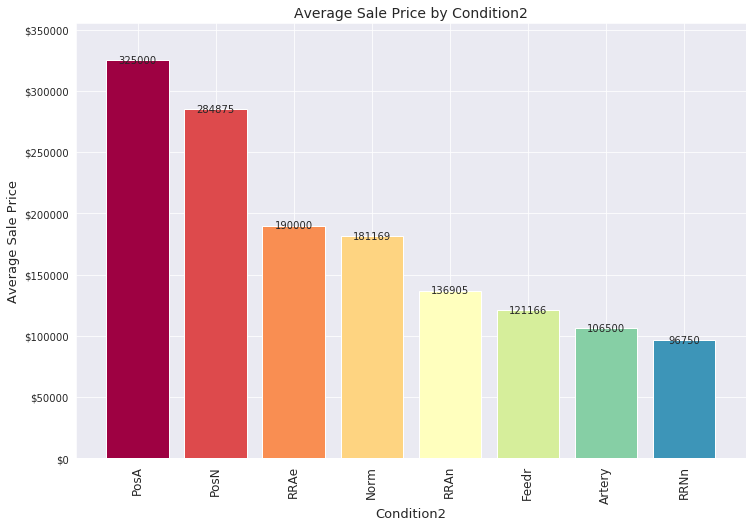

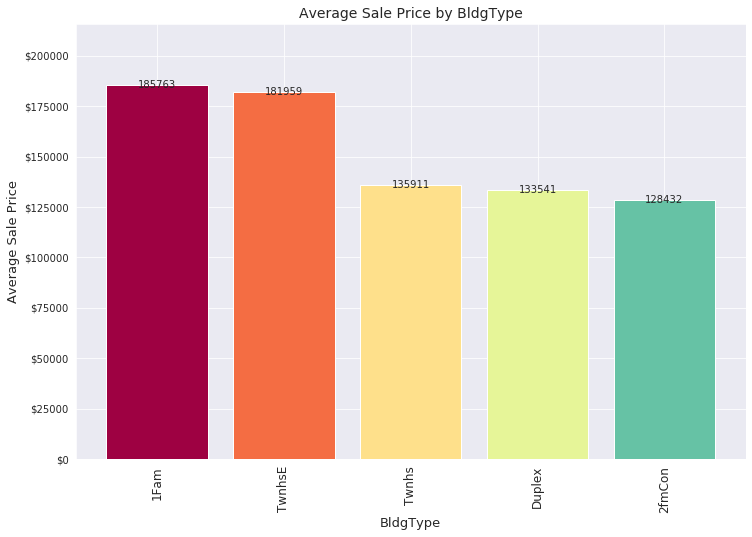

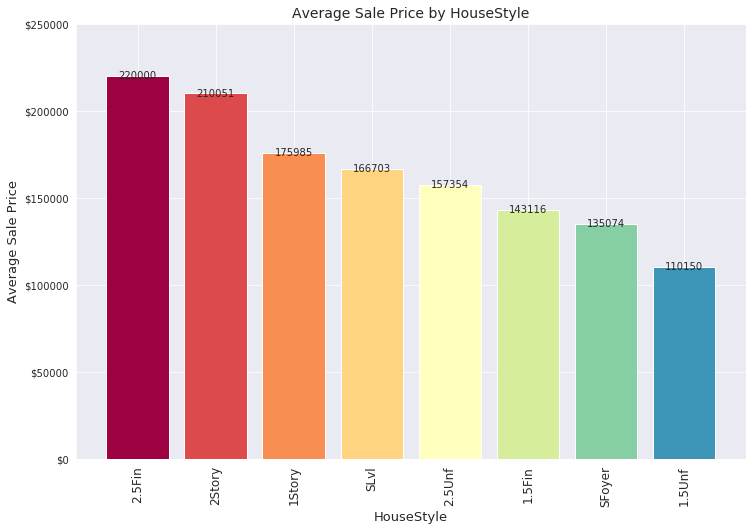

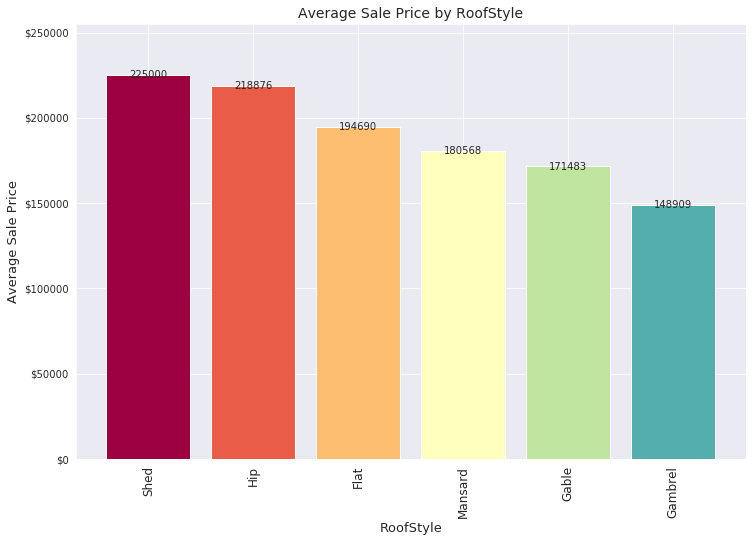

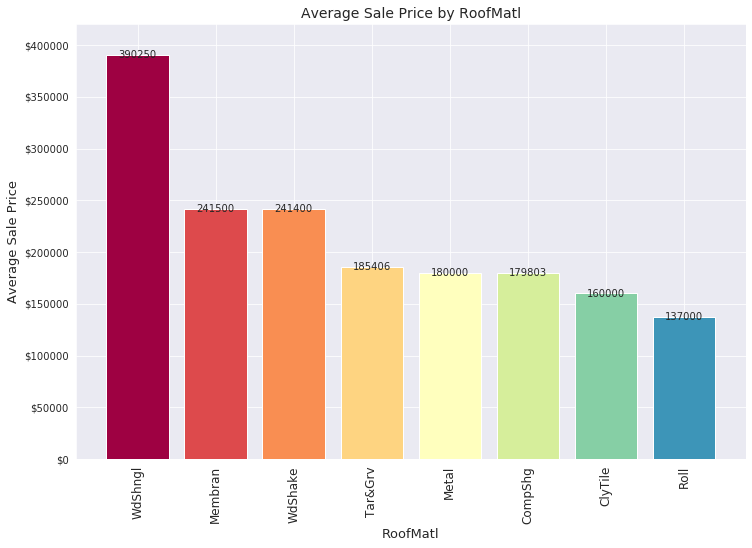

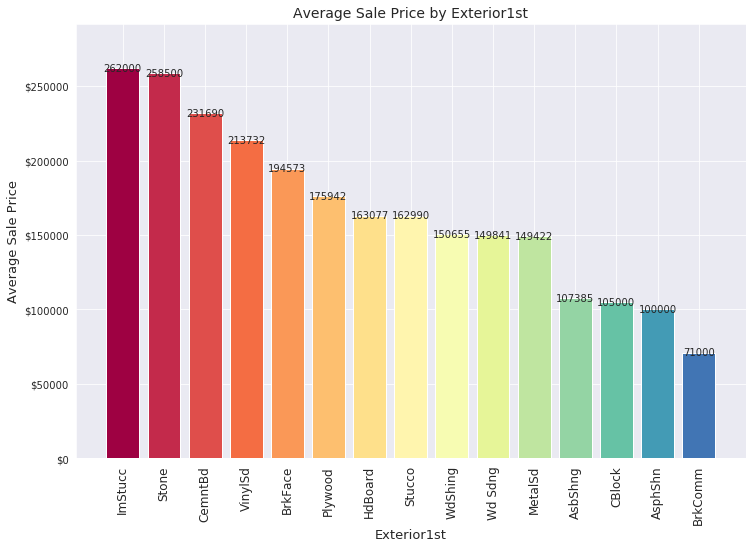

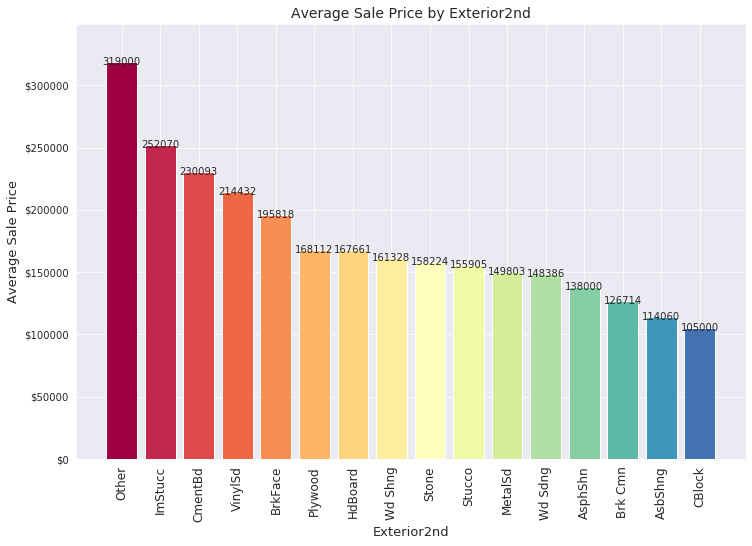

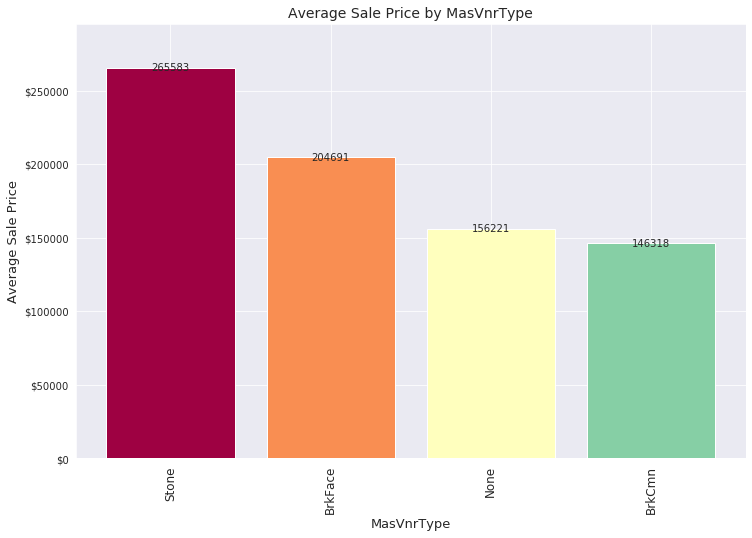

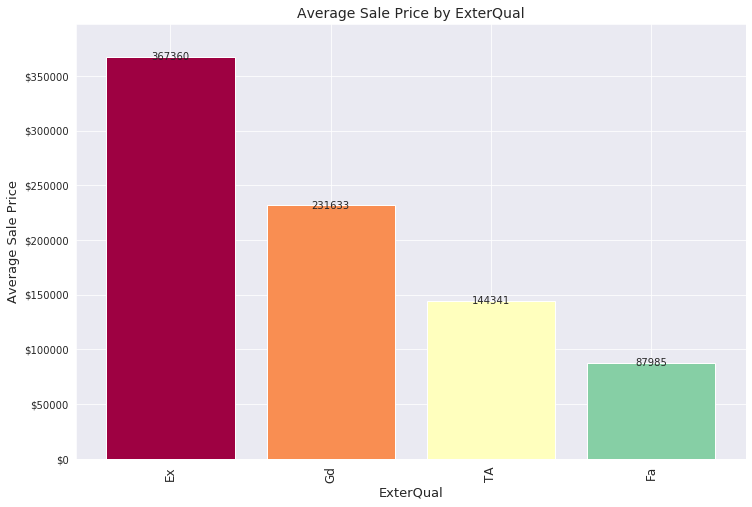

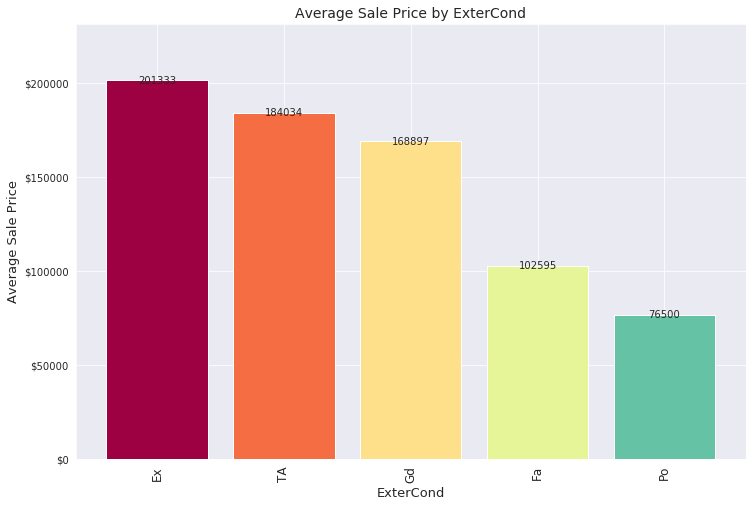

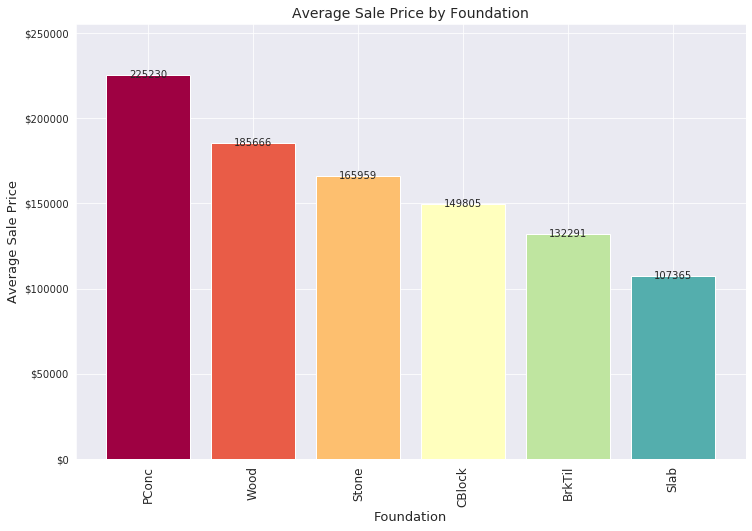

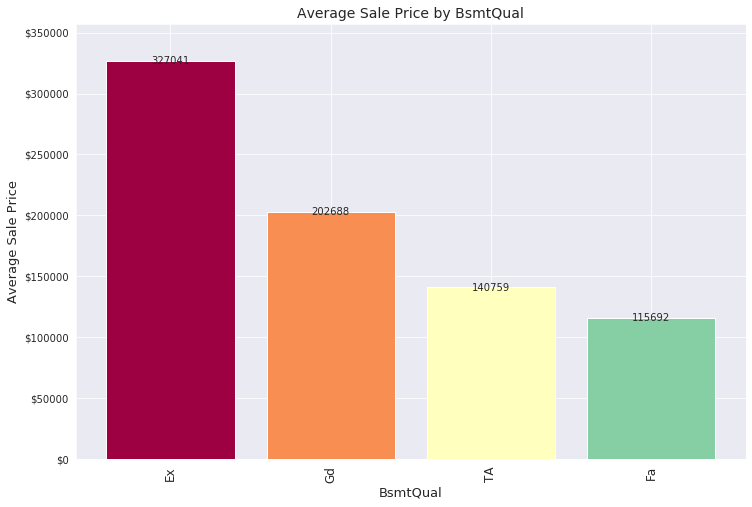

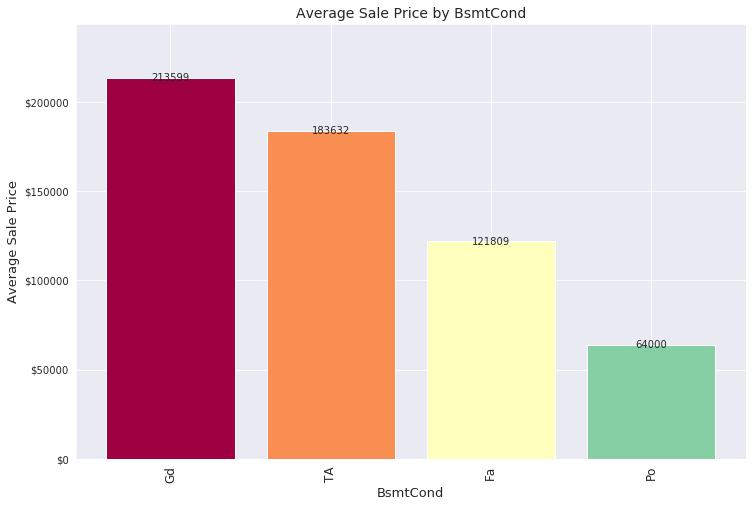

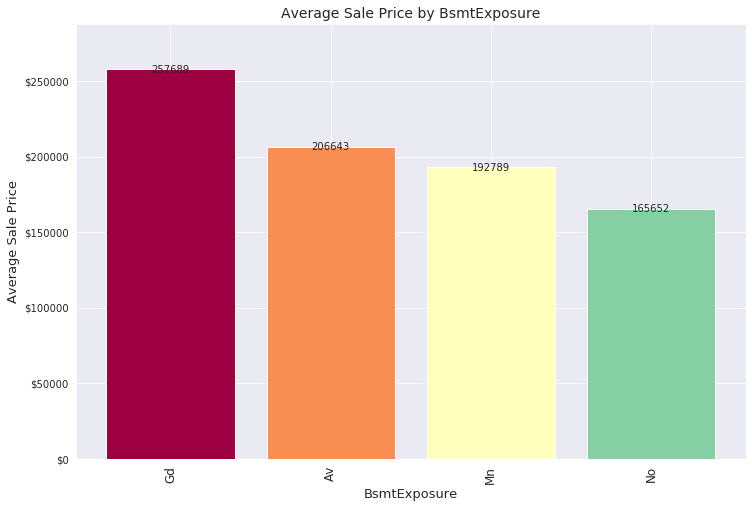

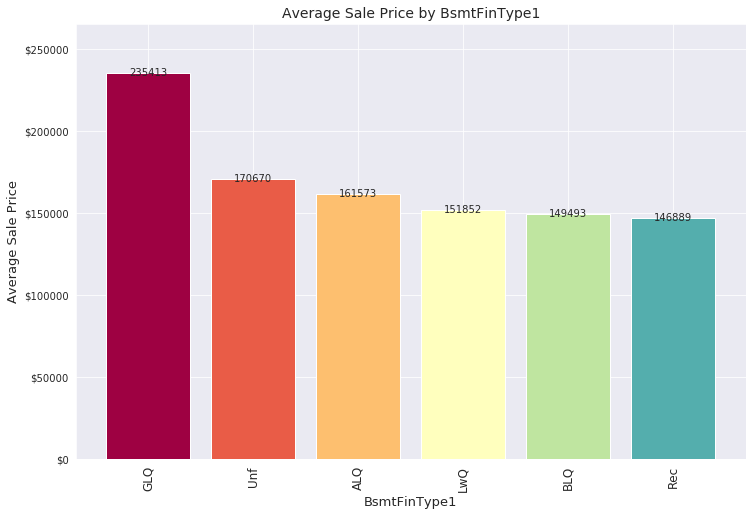

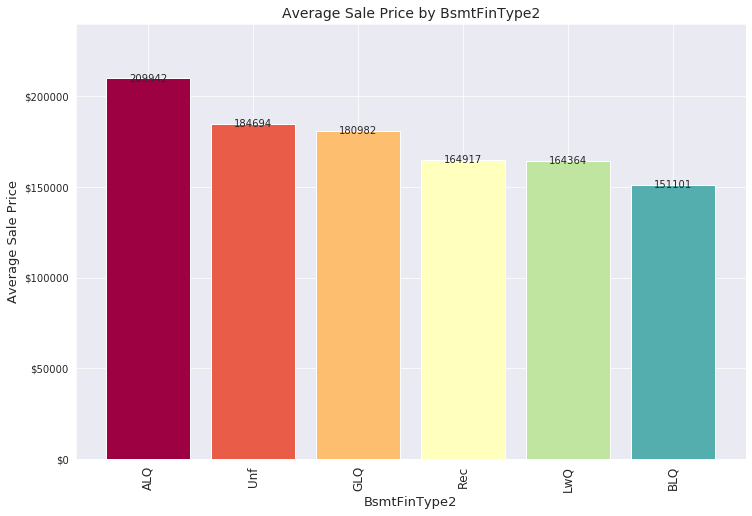

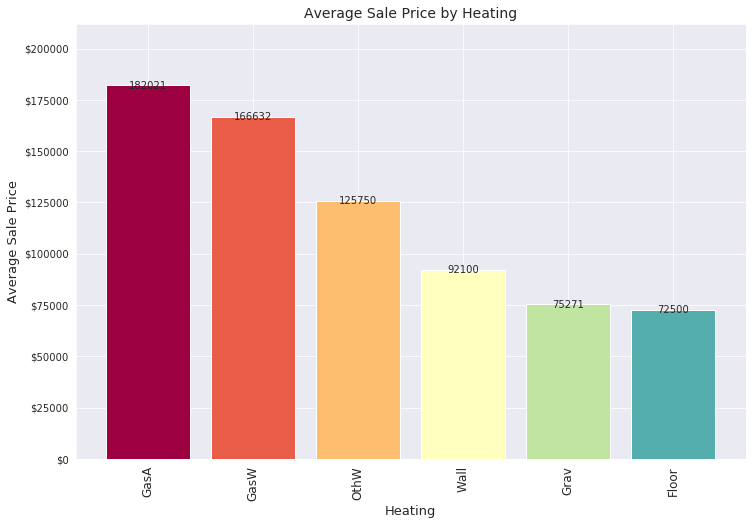

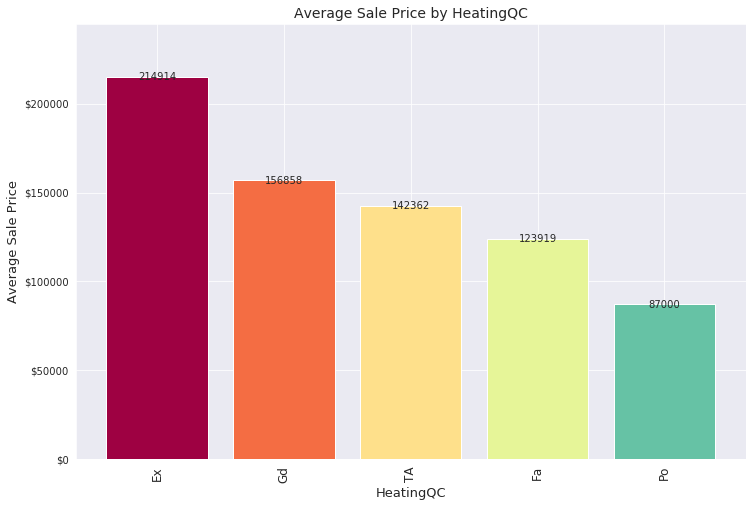

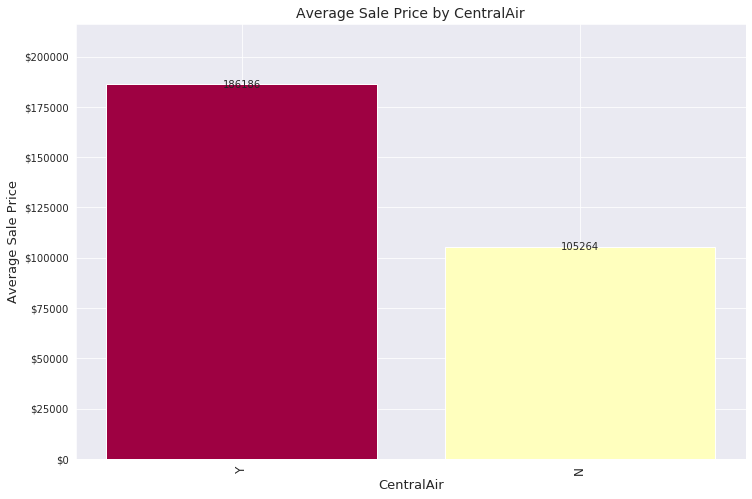

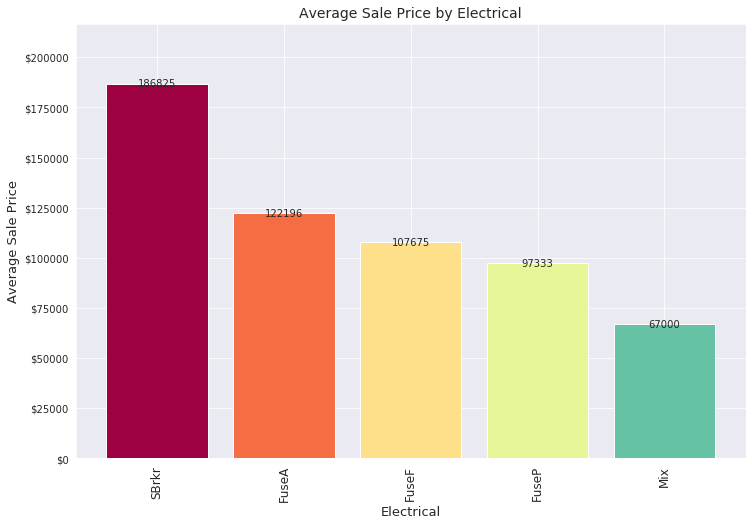

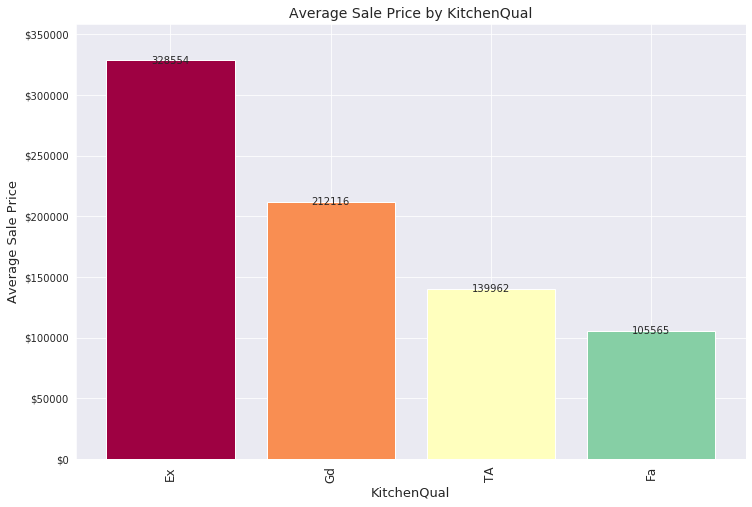

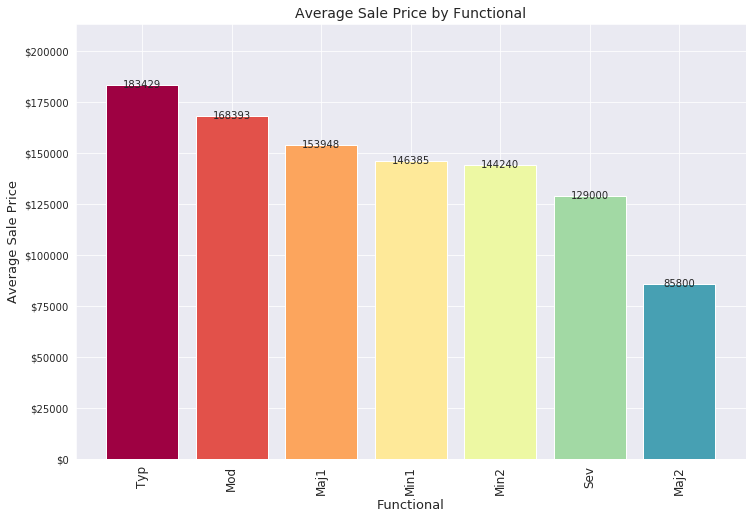

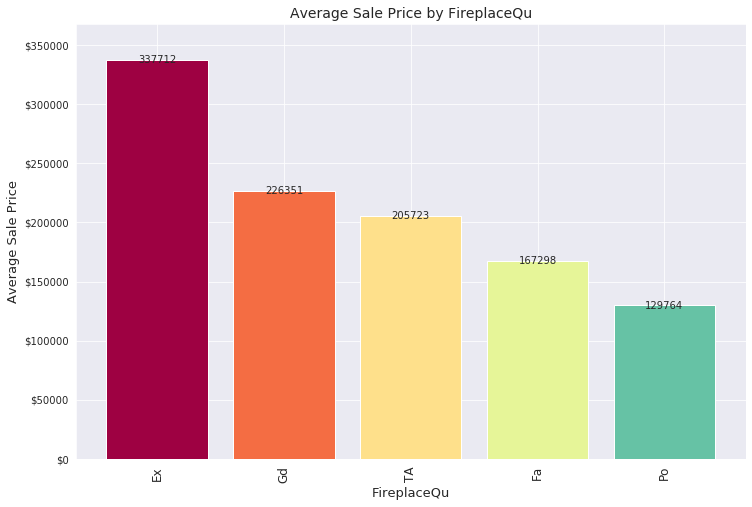

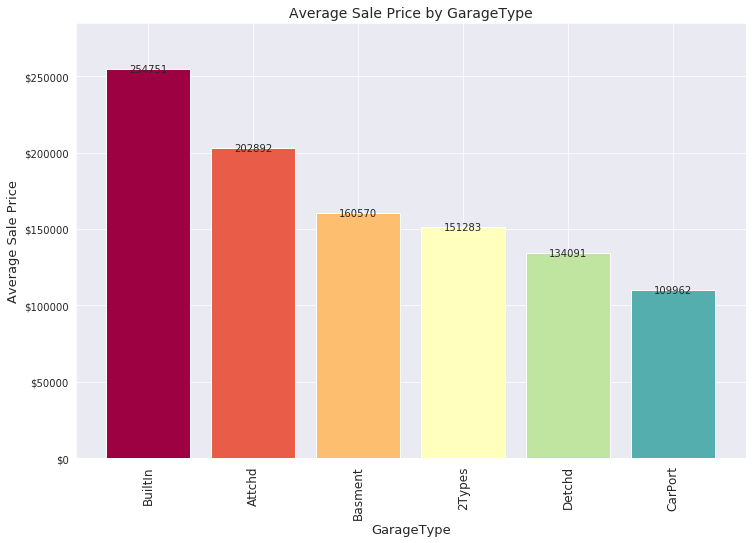

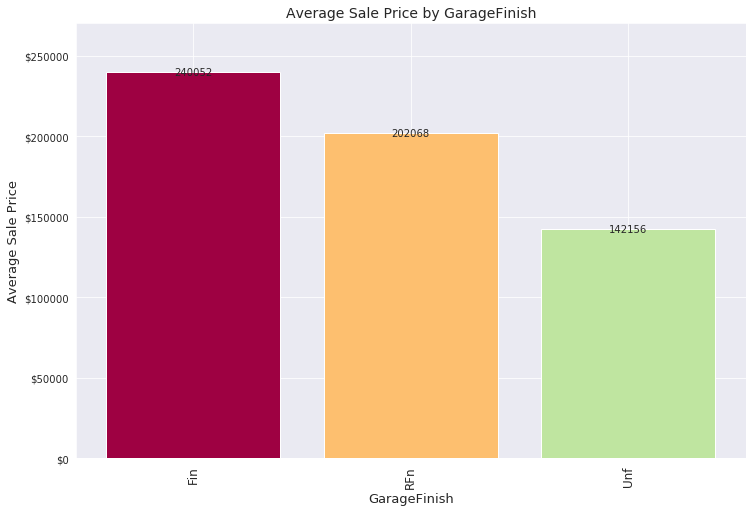

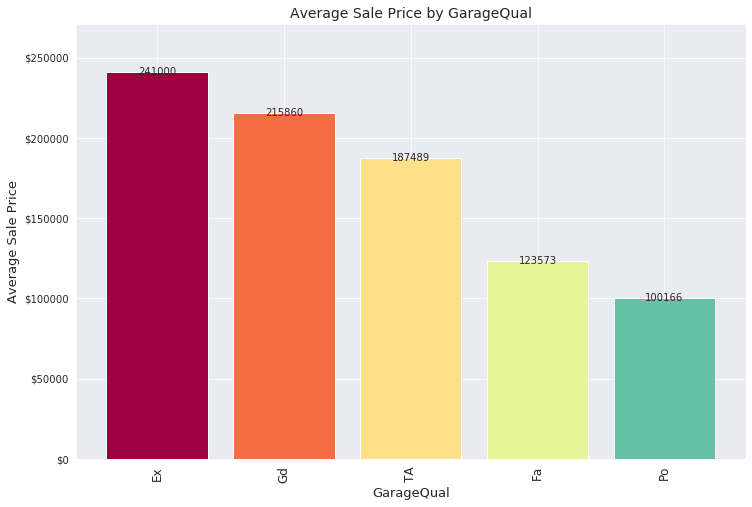

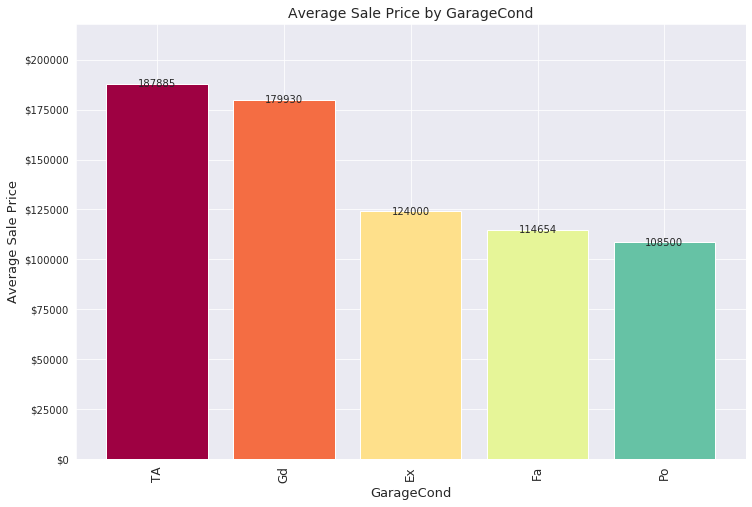

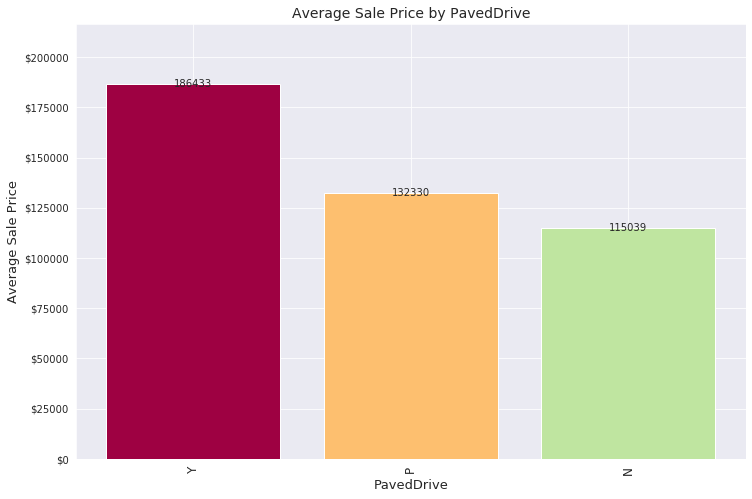

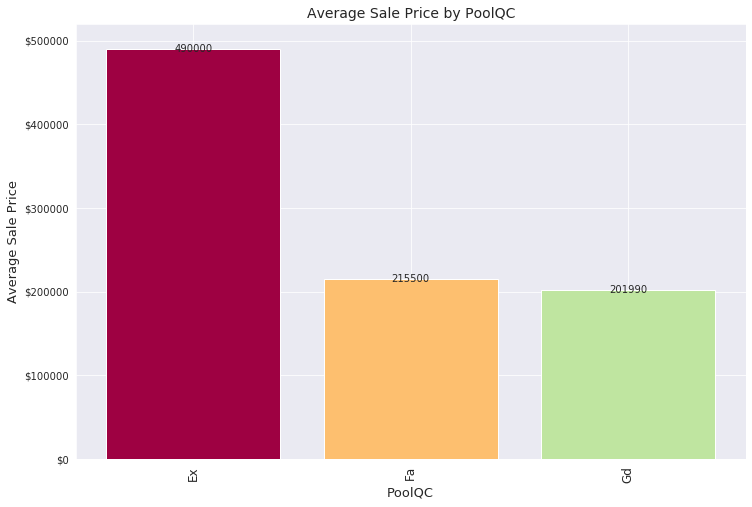

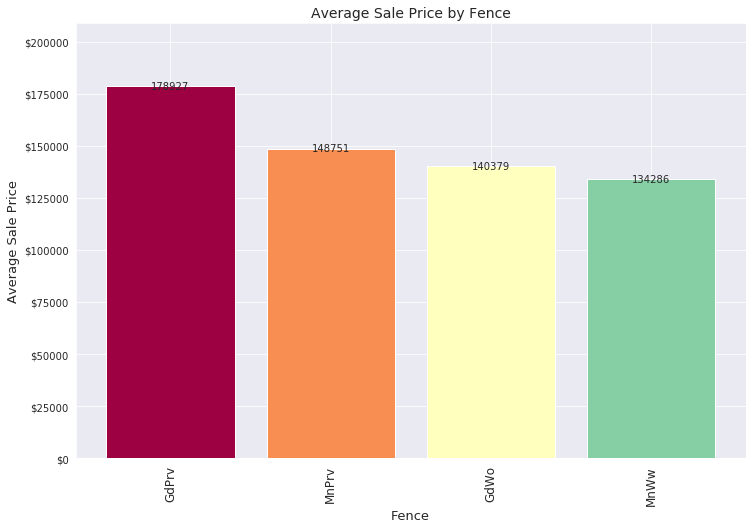

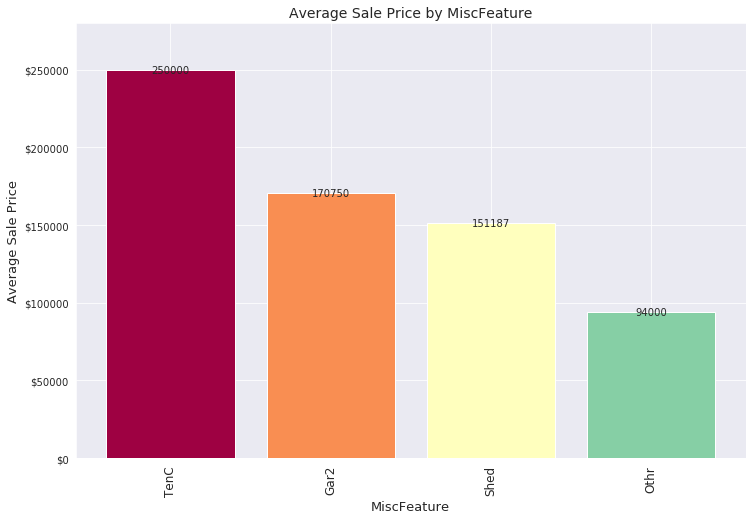

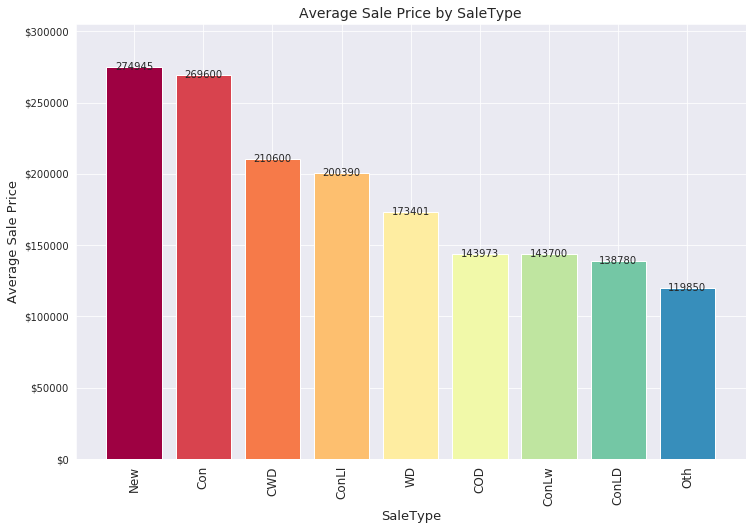

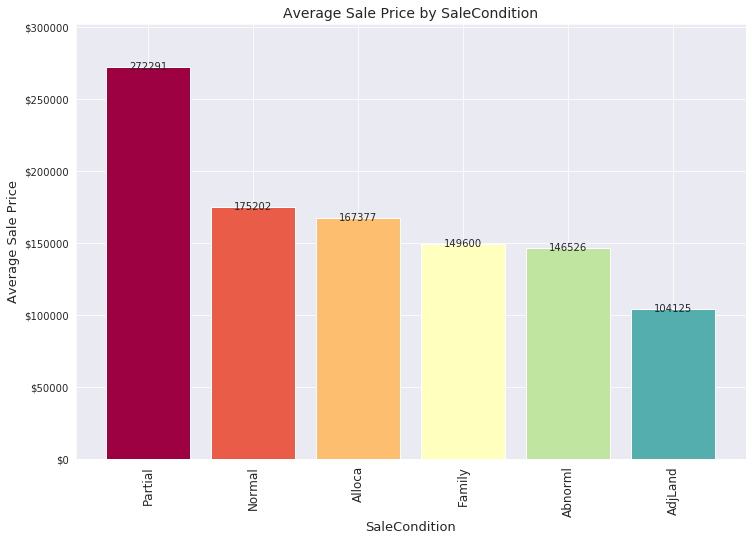

In [7]:
# Create a separate dateset with categorical variables
categorical_features = train.select_dtypes(include=[np.object])

import matplotlib.ticker as ticker
formatter = ticker.FormatStrFormatter('$%1.0f')

# Define a function to plot bar charts
def pivottabs(var):
    b=train[[var, 'SalePrice']].groupby([var], as_index=False).mean().sort_values(by='SalePrice', ascending=False)
    b['SalePrice'] = b['SalePrice'].astype(int)
    c=b['SalePrice'].max() + 30000
    d = dict(zip(b[var], b['SalePrice']))

    colors = [plt.cm.Spectral(i/float(len(d.keys()))) for i in range(len(d.keys()))]

    fig = plt.figure(figsize = (12, 8))
    ax = fig.add_subplot()

    ax.bar(d.keys(), d.values(), color = colors)

    for k, v in d.items():
        ax.text(k, v+1, v, fontsize = 10, horizontalalignment='center', verticalalignment='center')

    ax.tick_params(axis='x',  labelsize = 12, labelrotation = 90)
    ax.set_ylim(0, c)
    ax.yaxis.set_major_formatter(formatter)
    ax.set_ylabel('Average Sale Price', fontsize = 13)
    ax.set_xlabel(var, fontsize=13)
    ax.set_title("Average Sale Price by "+ var, fontsize = 14)
    
# call the function for each categorical variable 
for columns in categorical_features:
    pivottabs(columns)

# Observations - categorical variables

**MSZoning** - This represents the general zoning classification. The average sale price for FV and RL zones is higher than in other zones.

**Alley** - Alley represents the type of Alley access. Can we say that access to paved Alley would fetch you a better price for your property? We can't be so sure since more than 90% of values for this field are missing.

**LotShape** - Lotshape is the general shape of the property. It seems 'IR2' is the most preferred one.

**LandContour** - It represents flatness of the property. Though there is not a huge difference in average prices, 'HLS' seems to be preferred one. 

**Utilities** - It's evident that certain type (AllPub) of utilities is preferred over other.

**LotConfig** - It represents lot configuration. We do see LotConfig affecting the average sale price. 

**LandSlope** - The slope of the property seems to be slightly related.

**Neighborhood** - Highly related to Sale Price. We can clearly see that certain neighborhoods are preferred by buyers.

**Condition1 & Condition2** - These variables represent proximity to the main road or railroad and we can observe sale price varying by conditions.

**BldgType** - The average price for '1Fam' and 'twnhsE' type of dwelling is better than the other 3 dwelling types. 

**HouseStyle** - It represents the style of the dwelling and it appears that '2.5In' and '2Story' dwelling styles affect the sale price.  

**RoofStyle and RoofMatl** - RoofStyle and RoofMatl represent the type of roof and roof material respectively. It's evident that average prices for 'Shed' and 'Hip' roof-style and 'Wood Shingle' roof material impact sale price majorly.

**Exterior1st and Exterior2nd** - These 2 variables reflect exterior covering on the house and we can clearly notice some pattern there.

**MasVnrType** - 'Stone' is the preferred masonry veneer type.

**ExterQual and ExterCond** - These variables are all about the quality of the exterior material and present condition of the same. As we can see in bar charts, the exterior quality and present condition of exterior material makes a lot of difference to the average sale price
Foundation - Dwellings with 'PConc' foundation type fetch better average sale price. It seems 'Pconc' stands for concrete. 

**BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2** - These basement specific variables are about the quality and condition of the basement.
Heating - Gas heating seems to be the most preferred one and heated floors are not that popular.

**HeatingQC** - Excellent heating quality and condition show better average pricing.

**CentralAir** - Availability of a central air conditioning system makes a property costlier.

**Electrical** - 'SBrKr' type of electrical system seems to be important.

**KitchenQual** - 'Excellent' Kitchen quality represents the overall condition of the property. A house with a good quality kitchen is expected to be costlier.

**Functional** - 'Typ' home functionality rating is the preferred rating by home buyers. 

**FireplaceQu** - It indicates quality of the fireplace. Almost 47% of the observations are missing for this variable.

**GarageType, GarageFinish, GarageQual, and GarageCond** - These factors represent the garage location, finish, overall quality, and condition of the garage. 
PavedDrive - Paved driveway impacts the average prices.

**PoolQC** - It represents the condition of the pool if present. 99.5% properties do not have a pool 

**Fence** - Fence quality. 80% of the observations are missing. 

**MiscFeature** -  Miscellaneous feature not covered in other categories. 96% of the observations are missing.

**SaleType** - 9 categories of sale type. Properties with category 'New' fetched the highest average price.

**SaleCondition** - Represents the condition of the sale. 




**Check relationship between numerical variables and Sale Price**

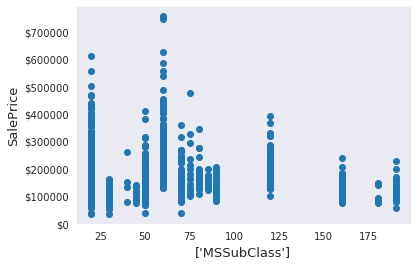

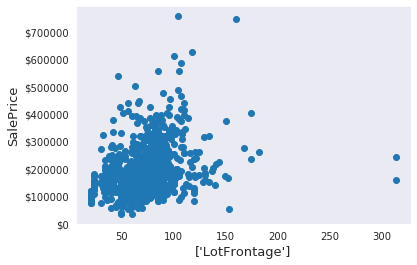

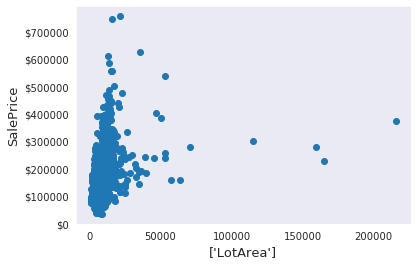

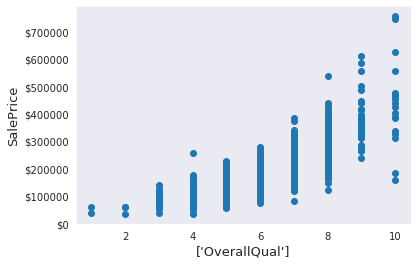

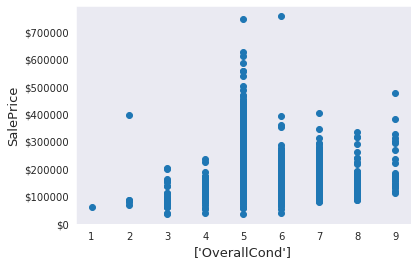

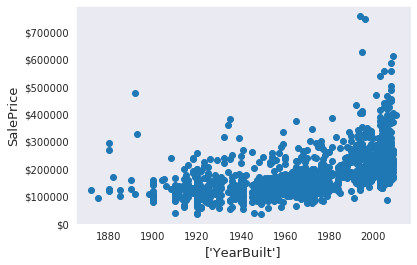

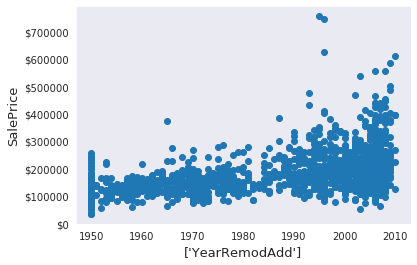

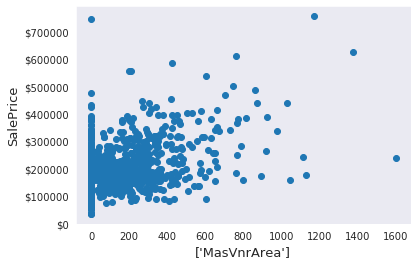

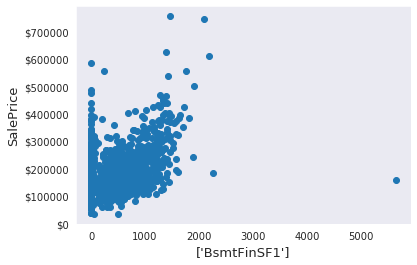

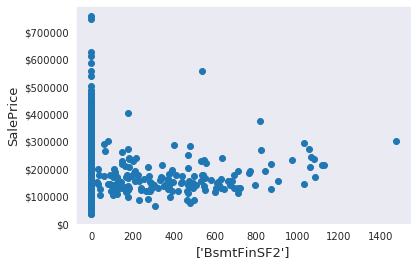

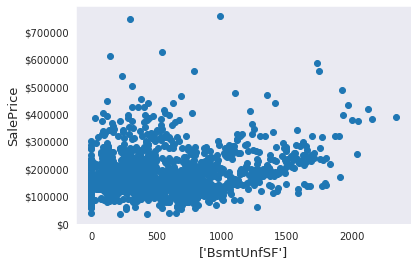

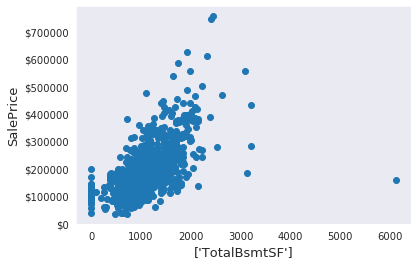

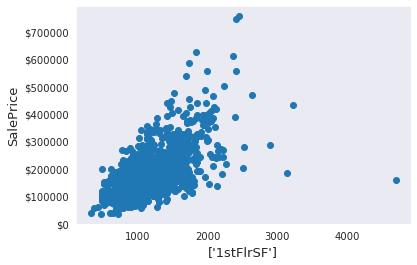

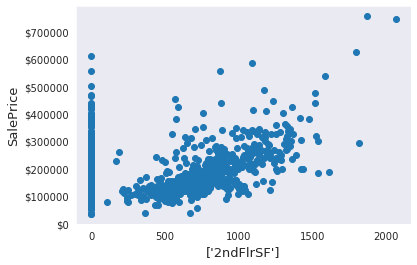

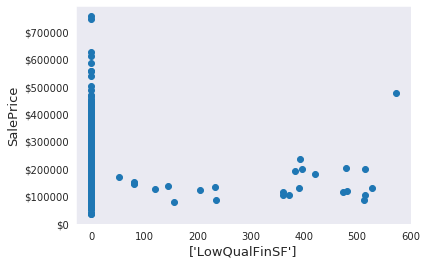

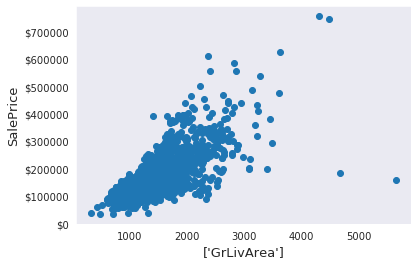

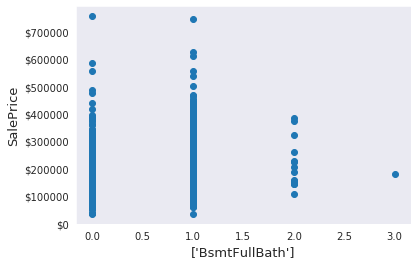

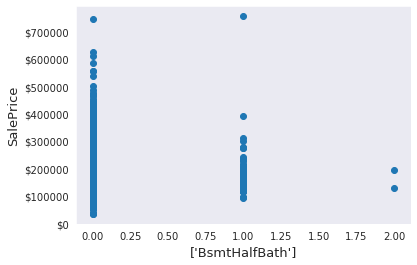

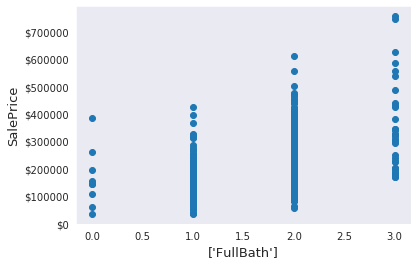

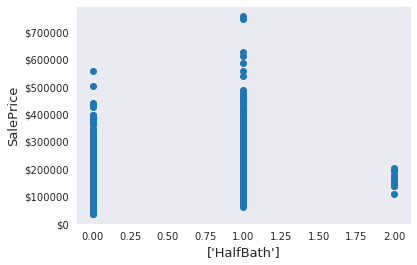

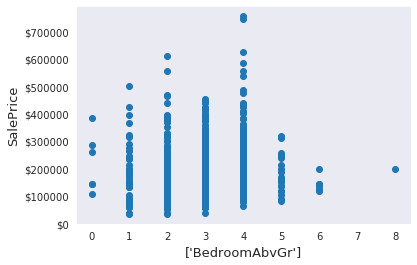

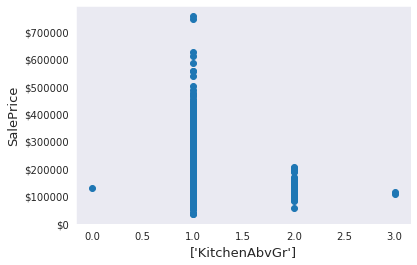

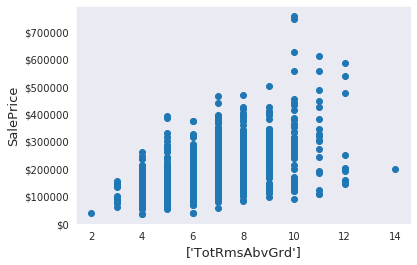

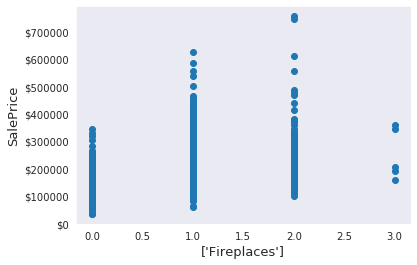

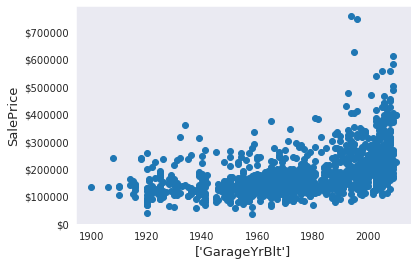

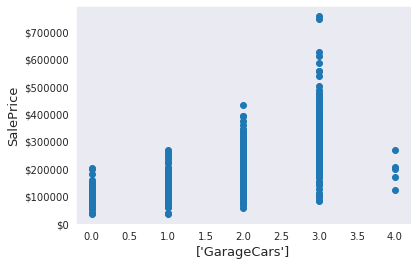

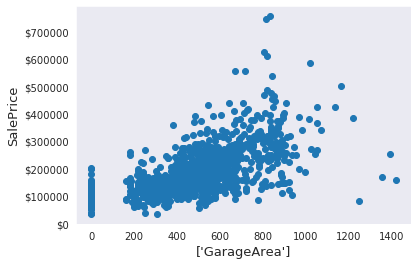

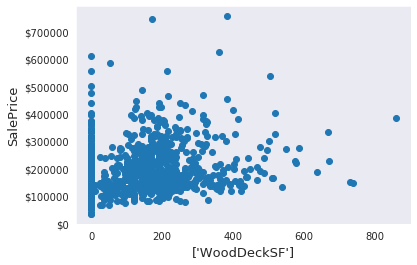

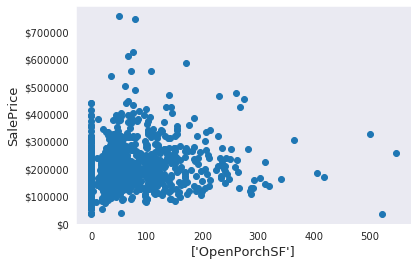

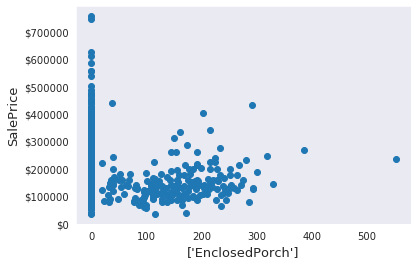

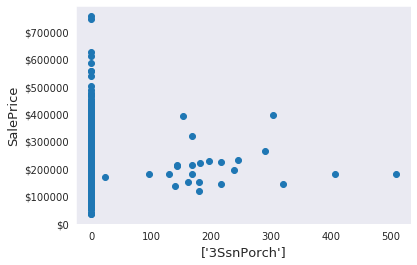

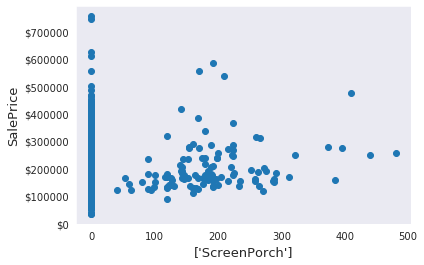

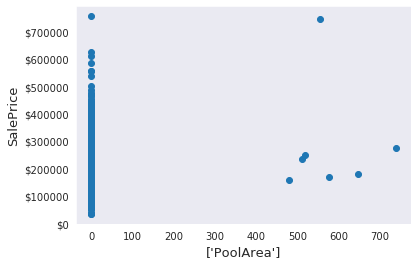

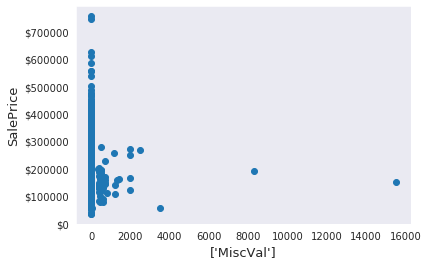

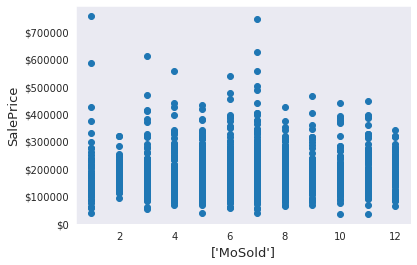

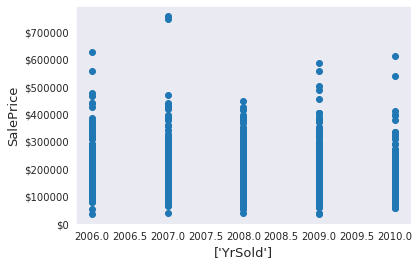

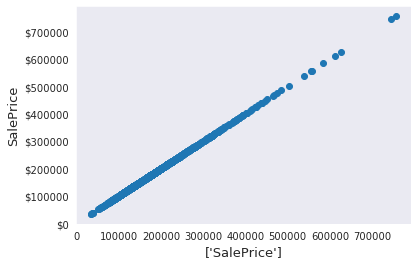

In [8]:

import matplotlib.ticker as ticker
formatter = ticker.FormatStrFormatter('$%.0f')
numeric_features = train.select_dtypes(include=[np.number])

def scatterplots(col):
    fig, ax = plt.subplots()
    ax.scatter(x = train[col], y = train['SalePrice'])
    ax.grid(False)
    ax.yaxis.set_major_formatter(formatter)
    plt.ylabel('SalePrice', fontsize=13)
    plt.xlabel([col], fontsize=13)
    plt.show()    
    
for columns in numeric_features:
    scatterplots(columns)

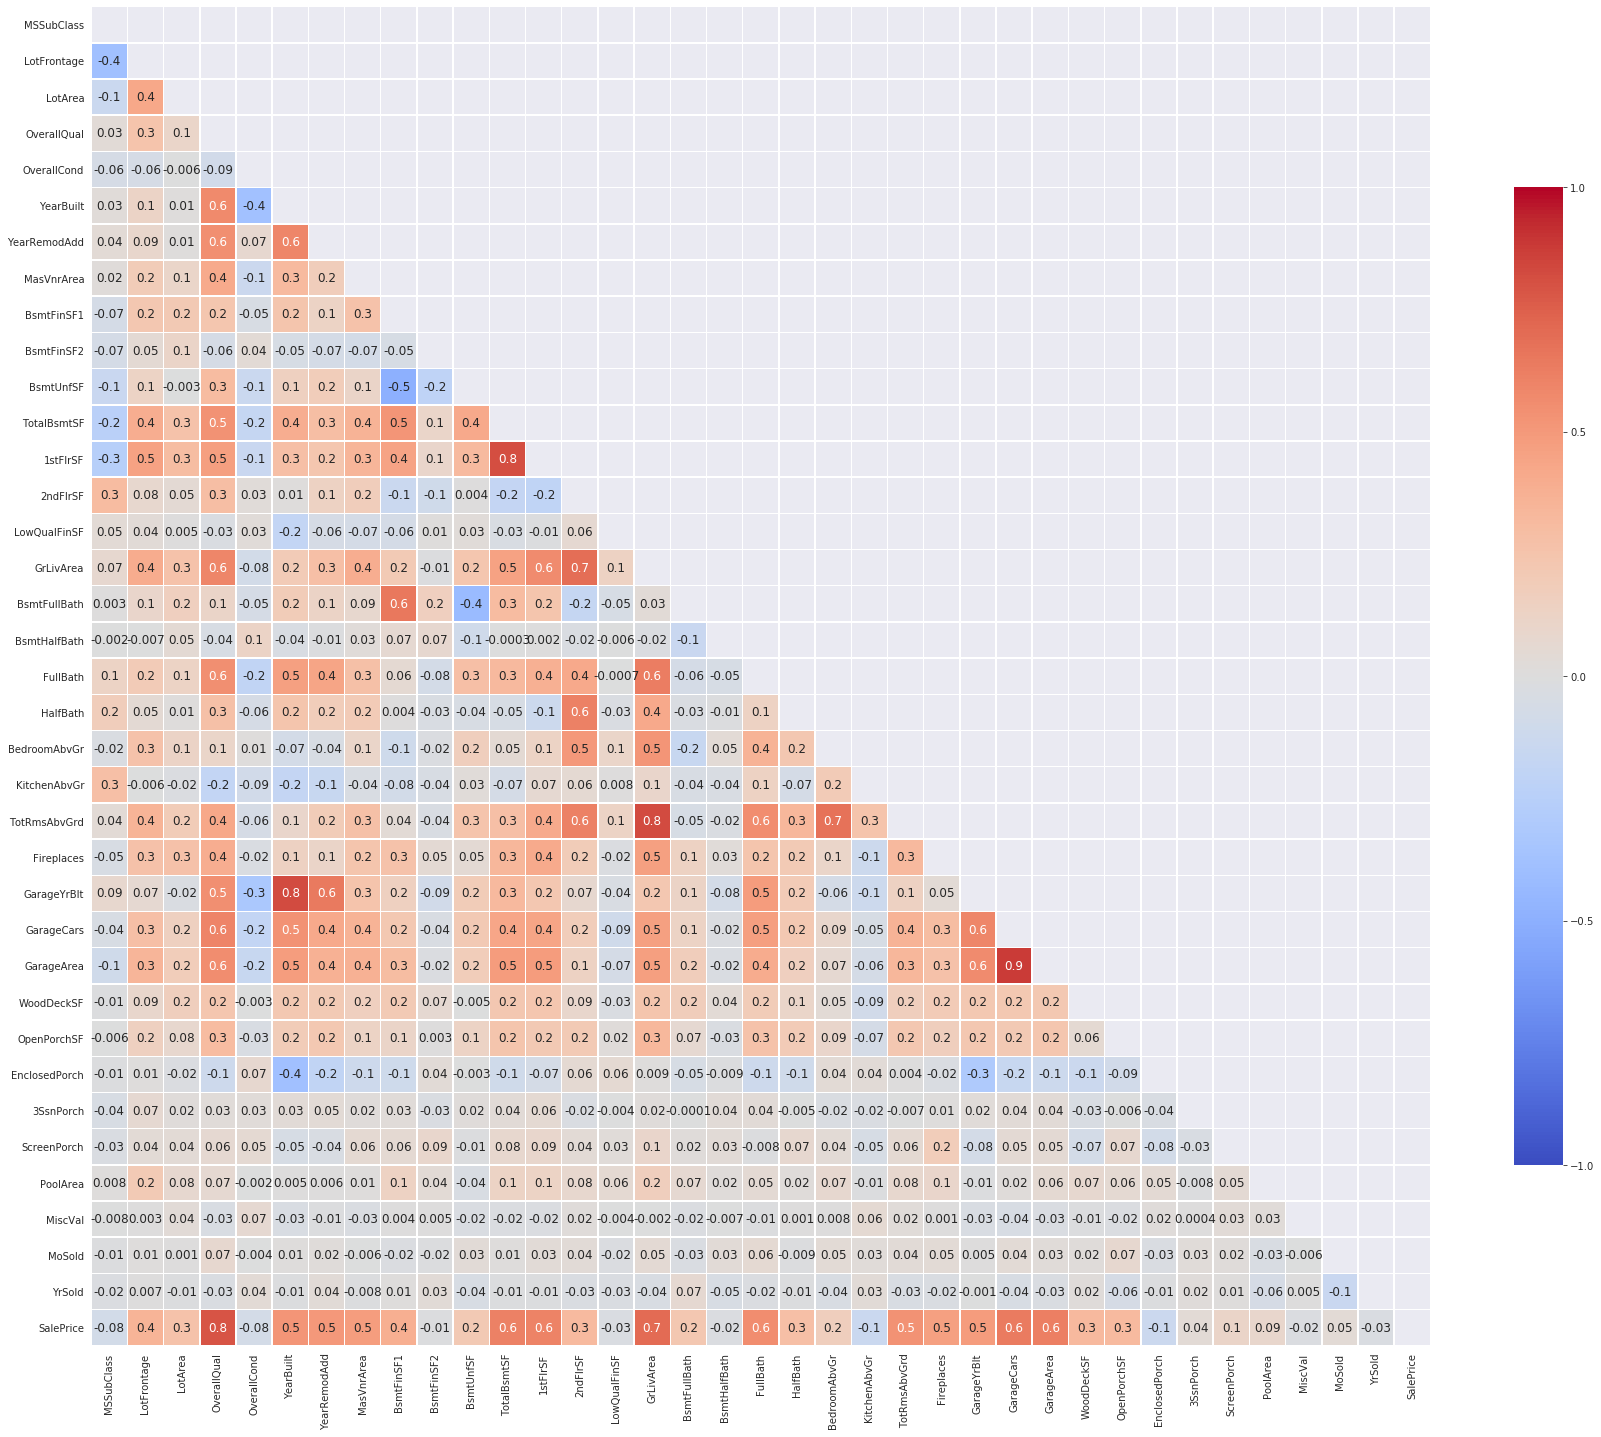

In [9]:
#Correlation map to see how features are correlated with SalePrice
corr_matrix = train.corr()
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)]= True

f, ax = plt.subplots(figsize=(30, 45)) 
heatmap = sns.heatmap(corr_matrix,
                      fmt='.1g' ,
                      mask = mask,
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4, 'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1, 
                      vmax = 1,
                      annot = True,
                      annot_kws = {'size': 12})
#add the column names as labels
ax.set_yticklabels(corr_matrix.columns, rotation = 0)
ax.set_xticklabels(corr_matrix.columns)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})


# Observations - continous variables


Based on scatterplot and correlation matrix, we can take certain decisions. 

**MSSub** - It's technically a categorical variable. The average sale price is high for certain categories so this variable might be useful 

**LotFrontage** - Doesn't look clearly associated with target variable

**LotArea** - Lot size in sq feet seems to be not correlated with the target variable.

**OverallQual** - Avg price increases with OverallQual and it's actually a categorical variable

**OverallCond** - Overall condition rating seems to be highly correlated with Sale Price and also correlated with other variables such as YearBuilt, YearRemodAdd for obvious reasons.

**YearBuilt** - Correlated with the target variable and other features and highly correlated with GarageYrBlt. We should use either one of them

**YearRemodAdd** - Shows some association with the target variable

**MasVnrArea** - 0.5 correlaion with target variable. We can park it for sometime and see how it affects ML algorithms

**BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF** - Low correlation. TotalBsmtSF is highly correlated with 1stFlrSF but since the impact of 1stFlrSF on the target variable is more than TotalBsmtSF, we will keep it and drop the other.

**1stFlrSF** - Correlated with GrLivArea. 

**2ndFlrSF** - Correlated with GrLivArea.

**LowQualFinSF** - Low correlation. 

**GrLivArea** - Highly correlated with the target variable. There are oultliers in GrLivArea which should be deleted since this variable shows a strong replationship with target variable

**BsmtFullBath and BsmtHalfBath** - Low correlation

**FullBath and HalfBath** - Can be used to create new feature total bathrooms

**BedroomAbvGr** - Low impact on target variable 

**KitchenAbvGr**	 - low correlation.	

**TotRmsAbvGrd** -  Total rooms above grade (does not include bathrooms) seems important	 

**Fireplaces** - Seems important so we will keep it	 

**GarageYrBlt** - It's correlated with YearBuilt 

**GarageCars** - Correlated with GarageArea and is of low importance 

**GarageArea** - Will keep this for further analysis

**WoodDeckSF** - Low correlation. 

**OpenPorchSF** - Low correlation. 

**EnclosedPorch** - Low correlation. 

**3SsnPorch** - Low correlation.  

**ScreenPorch** - Low correlation.

**PoolArea** - Low correlation. 

**MiscVal** - Low correlation. 

**MoSold** - Low correlation.  	 

**YrSold** - Low correlation.  



**Outliar Treatment**

In [10]:
# There are oultliers in GrLivArea which should be deleted since this variable shows a strong replationship with target variable
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)

**SalePrice** is the variable we need to predict. So let's do some analysis on this variable first.

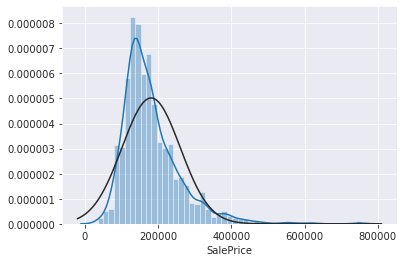

In [11]:
sns.distplot(train['SalePrice'] , fit=norm);

The target variable is right skewed.  As (linear) models love normally distributed data , we need to transform this variable and make it more normally distributed.

 **Log-transformation of the target variable**

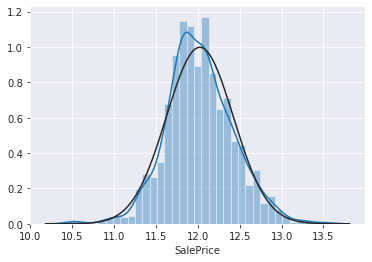

In [12]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
train["SalePrice"] = np.log1p(train["SalePrice"])

#Check the new distribution 
sns.distplot(train['SalePrice'] , fit=norm);

The skew seems now corrected and the data appears more normally distributed. 

let's first  concatenate the train and test data in the same dataframe

In [13]:
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.SalePrice.values
all_data = pd.concat((train, test)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)
print("all_data size is : {}".format(all_data.shape))

all_data size is : (2917, 79)


**Missing Data**

In [14]:
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head(20)

,Missing Ratio
PoolQC,99.691464
MiscFeature,96.400411
Alley,93.212204
Fence,80.425094
FireplaceQu,48.680151
LotFrontage,16.660953
GarageFinish,5.450806
GarageYrBlt,5.450806
GarageQual,5.450806
GarageCond,5.450806


Text(0.5, 1.0, 'Percentage missing data by feature')

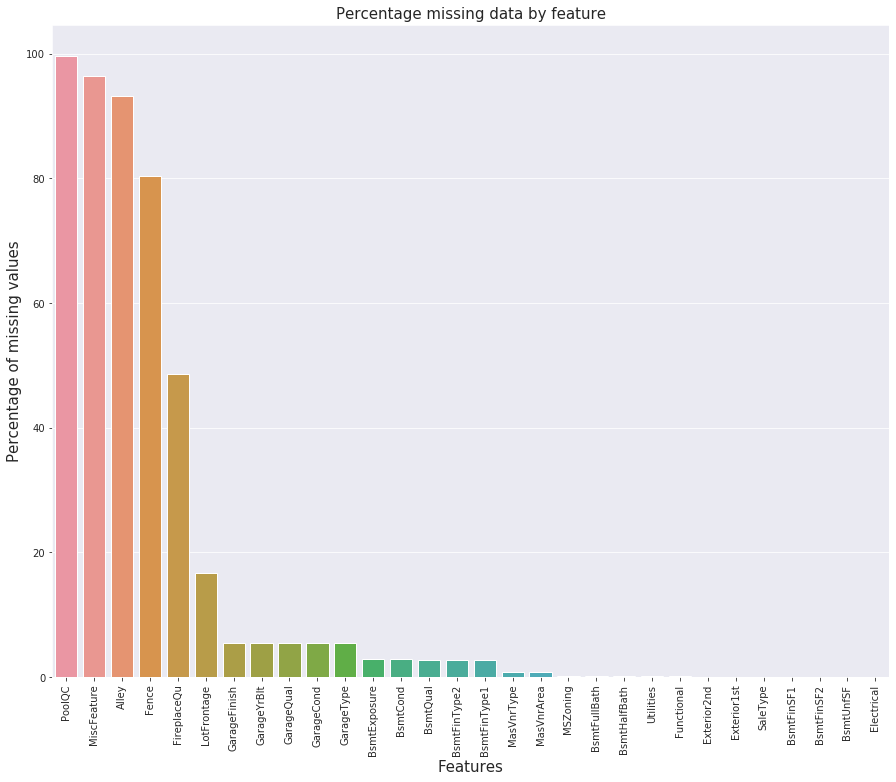

In [15]:
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=all_data_na.index, y=all_data_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percentage of missing values', fontsize=15)
plt.title('Percentage missing data by feature', fontsize=15)

# Imputing missing values

Let's impute the missing values - 

**Starting with variables which can be imputed with 'None'**

- **PoolQC** : data description says NA means "No  Pool". That make sense, given the huge ratio of missing value (+99%) and majority of houses have no Pool at all in general. 
- **MiscFeature** : data description says NA means "no misc feature"
- **Alley** : data description says NA means "no alley access"
- **Fence** : data description says NA means "no fence"
- **FireplaceQu** : data description says NA means "no fireplace"
- **GarageType, GarageFinish, GarageQual and GarageCond** : Replacing missing data with None
- **BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1 and BsmtFinType2** : For all these categorical basement-related features, NaN means that there is no  basement.
- **MasVnrType** : NA most likely means no masonry veneer for these houses. We can fill None for the type. 
- **MSSubClass** : Na most likely means No building class. We can replace missing values with None

In [16]:
for col in ('PoolQC','MiscFeature', 'Alley', 'Fence','FireplaceQu','GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
            'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'MasVnrType', 'MSSubClass'):
    all_data[col] = all_data[col].fillna('None')

**Feature that should be imputed with median values**

- **LotFrontage** : Since the area of each street connected to the house property most likely have a similar area to other houses in its neighborhood , we can **fill in missing values by the median LotFrontage of the neighborhood**.

In [17]:
#Group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

**Feature that should be imputed with 0**

- **GarageYrBlt, GarageArea and GarageCars** : Replacing missing data with 0 (Since No garage = no cars in such garage)
- **BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtFullBath and BsmtHalfBath** : missing values are likely zero for having no basement
- **MasVnrArea and MasVnrType** : NA most likely means no masonry veneer for these houses. We can fill 0 for the area and None for the type. 

In [18]:
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'MasVnrArea'):
    all_data[col] = all_data[col].fillna(0)

**Feature that should be imputed with respective mode values**

- **MSZoning (The general zoning classification)** :  'RL' is by far  the most common value.  So we can fill in missing values with 'RL'
- **Electrical** : It has one NA value. Since this feature has mostly 'SBrkr', we can set that for the missing value.
- **KitchenQual**: Only one NA value, and same as Electrical, we set 'TA' (which is the most frequent)  for the missing value in KitchenQual.
- **Exterior1st and Exterior2nd** : Again Both Exterior 1 & 2 have only one missing value. We will just substitute in the most common string
- **SaleType** : Fill in again with most frequent which is "WD"

In [19]:
for col in ('MSZoning', 'Electrical', 'KitchenQual', 'Exterior1st', 'Exterior2nd', 'SaleType'):
    all_data[col] = all_data[col].fillna(all_data[col].mode()[0])

- **Functional** : data description says NA means typical

In [20]:
all_data["Functional"] = all_data["Functional"].fillna("Typ")

In [21]:
all_data = all_data.drop(['Utilities'], axis = 1)

Is there any remaining missing value ? 

In [22]:
#Check remaining missing values if any 
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head()

,Missing Ratio


It remains no missing value.


**Transforming some numerical variables that are really categorical**

In [23]:
#MSSubClass=The building class
all_data['MSSubClass'] = all_data['MSSubClass'].apply(str)


#Changing OverallCond into a categorical variable
all_data['OverallCond'] = all_data['OverallCond'].astype(str)


#Year and month sold are transformed into categorical features.
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)

**Adding one more important feature**

Since area related features are very important to determine house prices, we add one more feature which is the total area of basement, first and second floor areas of each house

In [24]:
# Adding total sqfootage feature 
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF'] + all_data['GrLivArea'] + all_data['GarageArea']
all_data['Bathrooms'] = all_data['FullBath'] + all_data['HalfBath']*0.5 


# Treating skewed features

In [25]:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)



Skew in numerical features: 



,Skew
MiscVal,21.939672
PoolArea,17.688664
LotArea,13.109495
LowQualFinSF,12.084539
3SsnPorch,11.372080
KitchenAbvGr,4.300550
BsmtFinSF2,4.144503
EnclosedPorch,4.002344
ScreenPorch,3.945101
BsmtHalfBath,3.929996


**Box Cox Transformation of (highly) skewed features**

In [26]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    #all_data[feat] += 1
    all_data[feat] = boxcox1p(all_data[feat], lam)
    
#all_data[skewed_features] = np.log1p(all_data[skewed_features])

There are 34 skewed numerical features to Box Cox transform


**Getting dummy categorical features**

In [27]:

all_data = pd.get_dummies(all_data)
print(all_data.shape)

(2917, 339)


Getting the new train and test sets. 

In [28]:
train = all_data[:ntrain]
test = all_data[ntrain:]


**Import libraries**

In [29]:
import xgboost as xgb
import lightgbm as lgb
from lightgbm import LGBMRegressor
from sklearn.linear_model import Lars
from sklearn.linear_model import LassoLars
from sklearn.pipeline import make_pipeline
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import AdaBoostRegressor, BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone

from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve

# Define a cross validation strategy

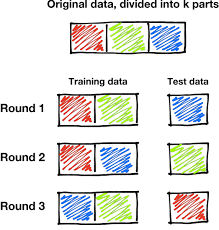

Cross Validation is one of the most powerful tool in Data Scientist's tool box. It helps you to understand the performance of your model and fight with overfitting. As we all know that Learning the model parameters and testing it on the same data is a big mistake. Such a model would have learned everything about the training data and would give result in a near perfect test score as it has already seen the data. The same model would fail terribly when tested on unseen data. This situation is called overfitting. To avoid it, it is common practice when performing a (supervised) machine learning experiment to hold out part of the available data as a test set X_test, y_test.

The general approach is as follows:

1. Split the dataset into k groups
2. For each unique group:

> * >  a. Keep one group as a hold out or test data set
* >  b. Use the remaining groups as training data set
* >  c. Build the model on the training set and evaluate it on the test set
* >  d. Save the evaluation score 

3. Summarize the performance of the model using the sample of model evaluation scores

You can access following link and read about Cross Validation in detail.

https://medium.com/datadriveninvestor/k-fold-cross-validation-6b8518070833 https://www.analyticsvidhya.com/blog/2018/05/improve-model-performance-cross-validation-in-python-r/

In [30]:
# Cross validate model with Kfold stratified cross val
n_folds = 5
kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)

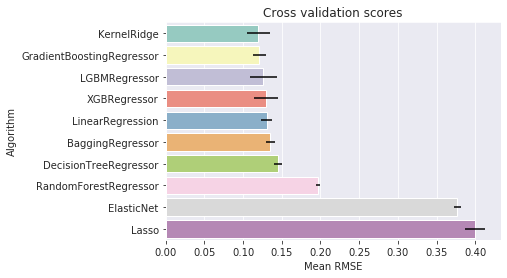

In [31]:
# Modeling differents algorithms. 

random_state = 2
regressor = []

regressor.append(LinearRegression())
regressor.append(KernelRidge())
regressor.append(ElasticNet(random_state=random_state))
regressor.append(Lasso(random_state=random_state))
regressor.append(GradientBoostingRegressor(random_state=random_state))
regressor.append(XGBRegressor(random_state = random_state))
regressor.append(LGBMRegressor(random_state=random_state))
regressor.append(BaggingRegressor(random_state=random_state))
regressor.append(RandomForestRegressor(random_state=random_state))
regressor.append(DecisionTreeRegressor(random_state=random_state))


cv_results = []
for regressor in regressor :
    cv_results.append(np.sqrt(-cross_val_score(regressor, train.values, y = y_train, scoring = "neg_mean_squared_error", cv = kf, n_jobs=4)))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,
                       "Algorithm":["LinearRegression",
                                    "KernelRidge",
                                    "ElasticNet",
                                    "Lasso",
                                    "GradientBoostingRegressor",
                                    "XGBRegressor",
                                    "LGBMRegressor",
                                    "DecisionTreeRegressor",
                                    "BaggingRegressor",
                                    "RandomForestRegressor"
                                    ]})

cv_res = cv_res.sort_values(by = 'CrossValMeans', ascending=True)
g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean RMSE")
g = g.set_title("Cross validation scores")

# GridSearch for parameter tuning

> **All codes commented post parameter tuning to save on run time.**

**Evaluating multiple models using GridSearch optimization method.**

Hyper-parameters are key parameters that are not directly learnt within the estimators. We have to pass these as arguments. Different hyper parameters can result in different model with varying performance/accuracy. To find out what paparmeters are resulting in best score, we can use Grid Search method and use the optimum set of hyper parameters to build and select a good model.

A search consists of:

* an estimator (regressor or classifier)
* a parameter space;
* a method for searching or sampling candidates;
* a cross-validation scheme; and
* a score function.

**KernelRidge**

Kernel ridge regression (KRR) combines ridge regression (linear least squares with l2-norm regularization) with the kernel trick. It thus learns a linear function in the space induced by the respective kernel and the data. For non-linear kernels, this corresponds to a non-linear function in the original space.

In [32]:
# KRR = KernelRidge()

# KRR_grid = {"alpha" : [25,10,4,2,1.0,0.8,0.5,0.3,0.2,0.1,0.05,0.02,0.01],
#                   "kernel" :   ["polynomial"],
#                   "degree" : [1,2,3,4,5],
#                   "coef0" :[1,1.5,2,2.5,3,3.5,4,4.5,5]
#                   }

# KRRModel = GridSearchCV(estimator = KRR, param_grid = KRR_grid, cv=kf, scoring="neg_mean_squared_error", n_jobs= 4, verbose = 1)
# KRRModel.fit(train,y_train)
# KRR_best = KRRModel.best_estimator_
# KRRModel.best_params_


**Gradient Boosting Regressor**

GB builds an additive model in a forward stage-wise fashion; it allows for the optimization of arbitrary differentiable loss functions. In each stage a regression tree is fit on the negative gradient of the given loss function.

In [33]:
# GBR = GradientBoostingRegressor()

# GBR_grid = {"n_estimators" : [2000,3000],
#             "learning_rate" :   [0.01,0.1],
#             "max_depth" : [3,5],
#             "max_features" :['sqrt'],
#             "min_samples_leaf" :[10,15],
#             "min_samples_split" :[2,5],
#             "loss" :['huber']            
#             }
 
# GBRModel = GridSearchCV(estimator = GBR, param_grid = GBR_grid, cv=kf, scoring="neg_mean_squared_error", n_jobs= 4, verbose = 1)
# GBRModel.fit(train,y_train)
# GBR_best = GBRModel.best_estimator_
# GBRModel.best_params_

**LGBMRegressor**

Light GBM is a gradient boosting framework that uses tree based learning algorithm. Light GBM grows tree vertically while other algorithm grows trees horizontally meaning that Light GBM grows tree leaf-wise while other algorithm grows level-wise. It will choose the leaf with max delta loss to grow. When growing the same leaf, Leaf-wise algorithm can reduce more loss than a level-wise algorithm.

In [34]:
# LGBM = LGBMRegressor()

# LGBM_grid = {"n_estimators" : [700, 720, 750],
#             "learning_rate" :   [0.01,0.03, 0.05],
#             "max_bin" :[55],
#             "bagging_fraction" :[0.8, 0.7],
#             "bagging_freq" :[5]
#             }

# LGBMModel = GridSearchCV(estimator = LGBM, param_grid = LGBM_grid, cv=kf, scoring="neg_mean_squared_error", n_jobs= 4, verbose = 1)
# LGBMModel.fit(train,y_train)
# LGBM_best = LGBMModel.best_estimator_
# LGBMModel.best_params_


**XGBRegressor**

The XGBoost is a popular supervised machine learning model with characteristics like fast in computation, parallelization, and better performance

In [35]:
# XGB = XGBRegressor()

# XGB_grid =    {'nthread':[4], 
#               'objective':['reg:linear'],
#               'learning_rate': [.03, 0.05, .07], #so called `eta` value
#               'max_depth': [5, 6, 7],
#               'min_child_weight': [4],
#               'silent': [1],
#               'subsample': [0.7],
#               'colsample_bytree': [0.7],
#               'n_estimators': [500]}
 
# XGBModel = GridSearchCV(estimator = XGB, param_grid = XGB_grid, cv=kf, scoring="neg_mean_squared_error", n_jobs= 4, verbose = 1)
# XGBModel.fit(train,y_train)
# XGB_best = XGBModel.best_estimator_
# XGBModel.best_params_

**Decision Tree Regressor**

A decision tree regressor

In [36]:
# DTR = DecisionTreeRegressor(random_state=0)

# DTR_grid =    {"criterion":['mse'],
#                "splitter":['best'],
#                "max_depth" : [2,3,5,10],
#             "max_features" :['sqrt'],
#             "min_samples_leaf" :[5,10,15],
#             "min_samples_split" :[1,2,5]
#               }
 
# DTRModel = GridSearchCV(estimator = DTR, param_grid = DTR_grid, cv=kf, scoring="neg_mean_squared_error", n_jobs= 4, verbose = 1)
# DTRModel.fit(train,y_train)
# DTR_best = DTRModel.best_estimator_
# DTRModel.best_params_

**Lasso**

lasso (least absolute shrinkage and selection operator; also Lasso or LASSO) is a regression analysis method that performs both variable selection and regularization in order to enhance the prediction accuracy and interpretability of the statistical model it produces.

In [37]:
# LARS = Lasso()

# LARS_grid = {"alpha" : [1,0.8,0.3,0.2,0.1,0.05,0.005,0.02,0.01],
#              "max_iter" :[500,700,1000]          
#                   }

# LARSModel = GridSearchCV(estimator = LARS, param_grid = LARS_grid, cv=kf, scoring="neg_mean_squared_error", n_jobs= 4, verbose = 1)
# LARSModel.fit(train,y_train)
# LARS_best = LARSModel.best_estimator_
# LARSModel.best_params_

# Building the base models

In [38]:
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [39]:
#Build the base models based on GridSearch tuning

KRR = KernelRidge(alpha=0.8, coef0=5, degree=2, gamma=None, kernel='polynomial', kernel_params=None)

lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, max_iter = 500, random_state=1))

ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))

GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.01, max_depth=3, max_features='sqrt', min_samples_leaf=10, min_samples_split=5, loss='huber')

model_xgb = xgb.XGBRegressor(colsample_bytree=0.7, learning_rate=0.03, max_depth=6, min_child_weight=4, n_estimators=500, subsample=0.7, silent=1, random_state =7)

model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,learning_rate=0.05, n_estimators=720, max_bin = 55, bagging_fraction = 0.8, bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9, min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

model_DTR = DecisionTreeRegressor(criterion = 'mse', max_depth = 10, max_features = 'sqrt', min_samples_leaf = 5, min_samples_split = 2, splitter = 'best' )

LRModel = LinearRegression()

In [40]:
score = rmsle_cv(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = rmsle_cv(lasso)
print("Lasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = rmsle_cv(model_lgb)
print("LGBM score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

score = rmsle_cv(model_DTR)
print("DT Regression score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

score = rmsle_cv(LRModel)
print("Linear Regression score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

Kernel Ridge score: 0.1146 (0.0056)

Lasso score: 0.1108 (0.0069)

ElasticNet score: 0.1108 (0.0070)

Gradient Boosting score: 0.1137 (0.0080)

Xgboost score: 0.1143 (0.0072)

LGBM score: 0.1170 (0.0076)

DT Regression score: 0.2136 (0.0127)

Linear Regression score: 0.1305 (0.0151)



# Averaging the base models

In [41]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)   

In [42]:
#Averaging the best models to optimize the prediction.

#averaged_models = AveragingModels(models = (KRR, lasso, ENet, GBoost, model_xgb, model_lgb, model_DTR, LRModel))
averaged_models = AveragingModels(models = (KRR, ENet, GBoost, lasso, model_xgb))

score = rmsle_cv(averaged_models)
print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

 Averaged base models score: 0.1081 (0.0069)



# Final submission

In [43]:
averaged_models.fit(train.values, y_train)
averaged_models_pred = np.expm1(averaged_models.predict(test.values))

In [44]:
sub = pd.DataFrame()
sub['Id'] = test_ID
sub['SalePrice'] = averaged_models_pred
sub.to_csv('finalSubmission.csv',index=False)

**If you found this notebook helpful or you just liked it , some upvotes would be very much appreciated -  That will keep me motivated** :-)

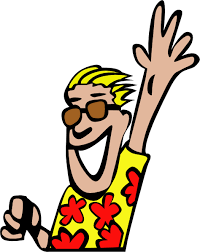

